In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Get the path of the dataset from google drive.</br>
Use pandas to read the csv file.</br>
Display the first 5 rows of the dataset.

In [ ]:
path = "/content/drive/MyDrive/Datasets/Housing.csv"
df = pd.read_csv(path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Utilize the OneHotEncoder method from the sklearn.</br>
Preprocessing library to transform the furnishingstatus column from strings into numerical representations, enabling the machine learning model to evaluate the data more effectively.</br>
Then Concatenated the transformed results back into the main DataFrame.
Display the first 5 rows of the updated DataFrame to verify the changes.

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[['furnishingstatus']])
df = pd.concat([df,one_hot_encoded],axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.0,0.0,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.0,0.0,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.0,1.0,0.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1.0,0.0,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1.0,0.0,0.0


Replaced all variables with string-based binary values with their corresponding numerical binary representations.

In [ ]:
df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)
df.head()

<ipython-input-5-9a6f05c09371>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1.0,0.0,0.0


Dropped the furnishingstatus column as its information has already been effectively utilized in a better format.

In [ ]:
df.drop('furnishingstatus',axis = 1,inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


Computed the correlation matrix to analyze the relationships between the variables in the dataset.

In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


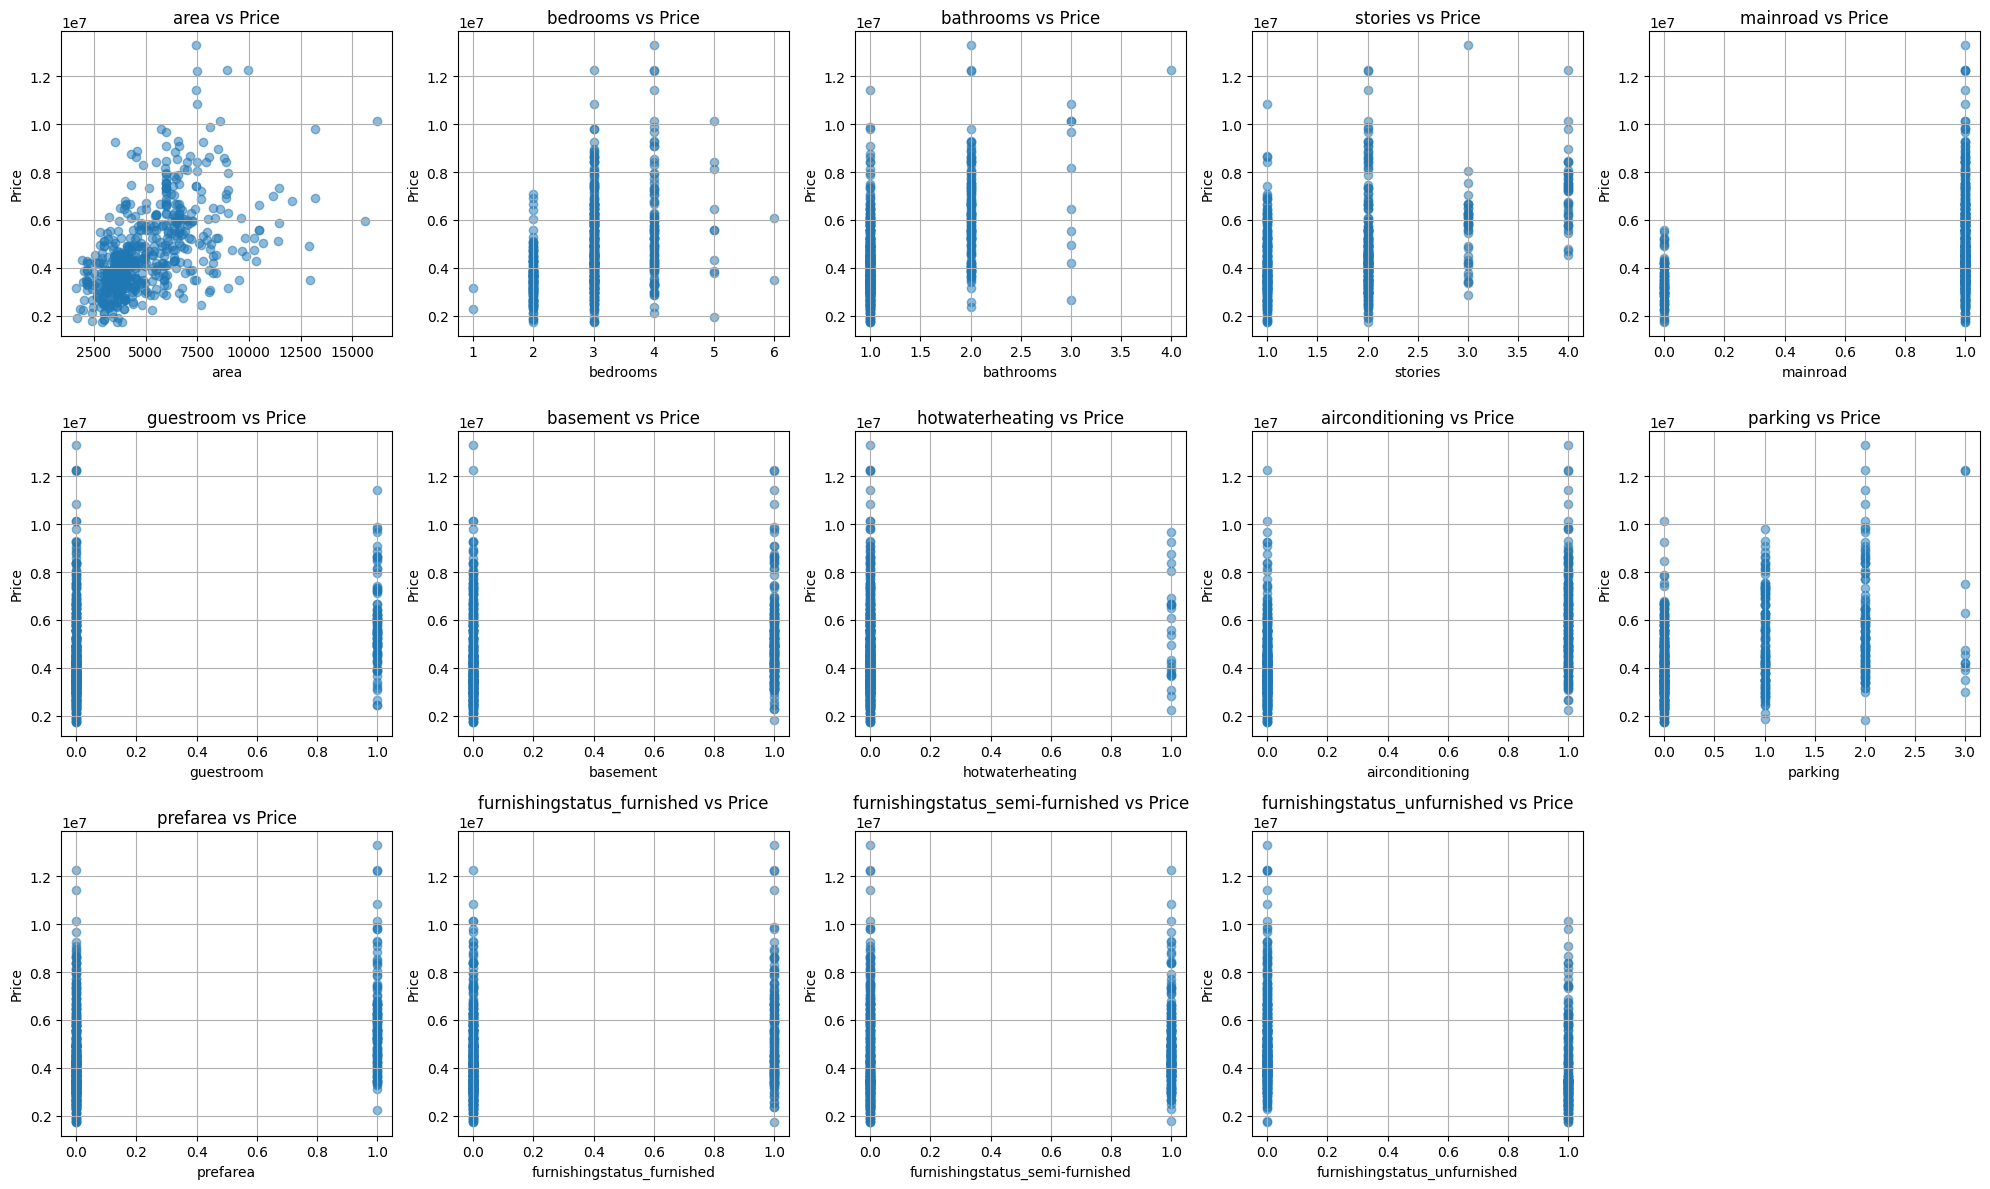

In [ ]:
features = df.columns[df.columns != 'price']
n_features = len(features)
n_rows = (n_features // 5) + (1 if n_features % 5 != 0 else 0)
fig, axes = plt.subplots(n_rows, 5, figsize=(20, 4 * n_rows))
axes = axes.flatten()
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df[feature], df['price'], alpha=0.5)
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid(True)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


Removed outliers from dataset using IQR.

In [ ]:
print(df.shape)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(df.shape)

(545, 15)
(530, 15)


Check the datatype of the price column

In [ ]:
print(df['price'].dtypes)

int64


Scaled down the price column to simplify analysis

In [ ]:
df['price'] = df['price'].astype(float)
df.loc[:, 'price'] = df['price'] / 100000
df.head()

<ipython-input-11-904138d1c13f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,91.00,6000,4,1,2,1,0,1,0,0,2,0,0.0,1.0,0.0
16,91.00,6600,4,2,2,1,1,1,0,1,1,1,0.0,0.0,1.0
17,89.60,8500,3,2,4,1,0,0,0,1,2,0,1.0,0.0,0.0
18,88.90,4600,3,2,2,1,1,0,0,1,2,0,1.0,0.0,0.0
19,88.55,6420,3,2,2,1,0,0,0,1,1,1,0.0,1.0,0.0


Check the dataset if strings still exist to eliminate them.

In [ ]:
def check_columns_for_strings(df):
    string_columns = []
    for column in df.columns:
        if df[column].dtype == object or any(isinstance(x, str) for x in df[column]):
            string_columns.append(column)
    return string_columns
string_columns = check_columns_for_strings(df)
print("Columns containing strings:", string_columns)

Columns containing strings: []


Check for null values

In [ ]:
if df.isnull().sum().sum() == 0:
    print("No null values")
else:
    print("Null values")
    df.isnull().sum()

No null values



Check for duplicates and remove them if they exist

In [ ]:
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
else:
  print("No duplicates")

No duplicates


Create our training and testing data.
X_train is the training set which contains all the features that needs to predict y_train which is the price. X_test and y_test are the same respectively. We split the data 70% for training and 30% for testing.

In [ ]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(371, 14) (371,)
(159, 14) (159,)


Use the Z-score normalization technique, which is defined by the formula:

$$
Z = \frac{X - \mu}{\sigma}
$$

This technique normalizes the data by adjusting it such that the mean (
𝜇
μ) becomes 0 and the standard deviation (
𝜎
σ) becomes 1. It transforms the data to a common scale, allowing different features to have the same parameters, making it easier to compare and process in machine learning models.

In [ ]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, sigma, mu)

Visualize the transformation of the data.

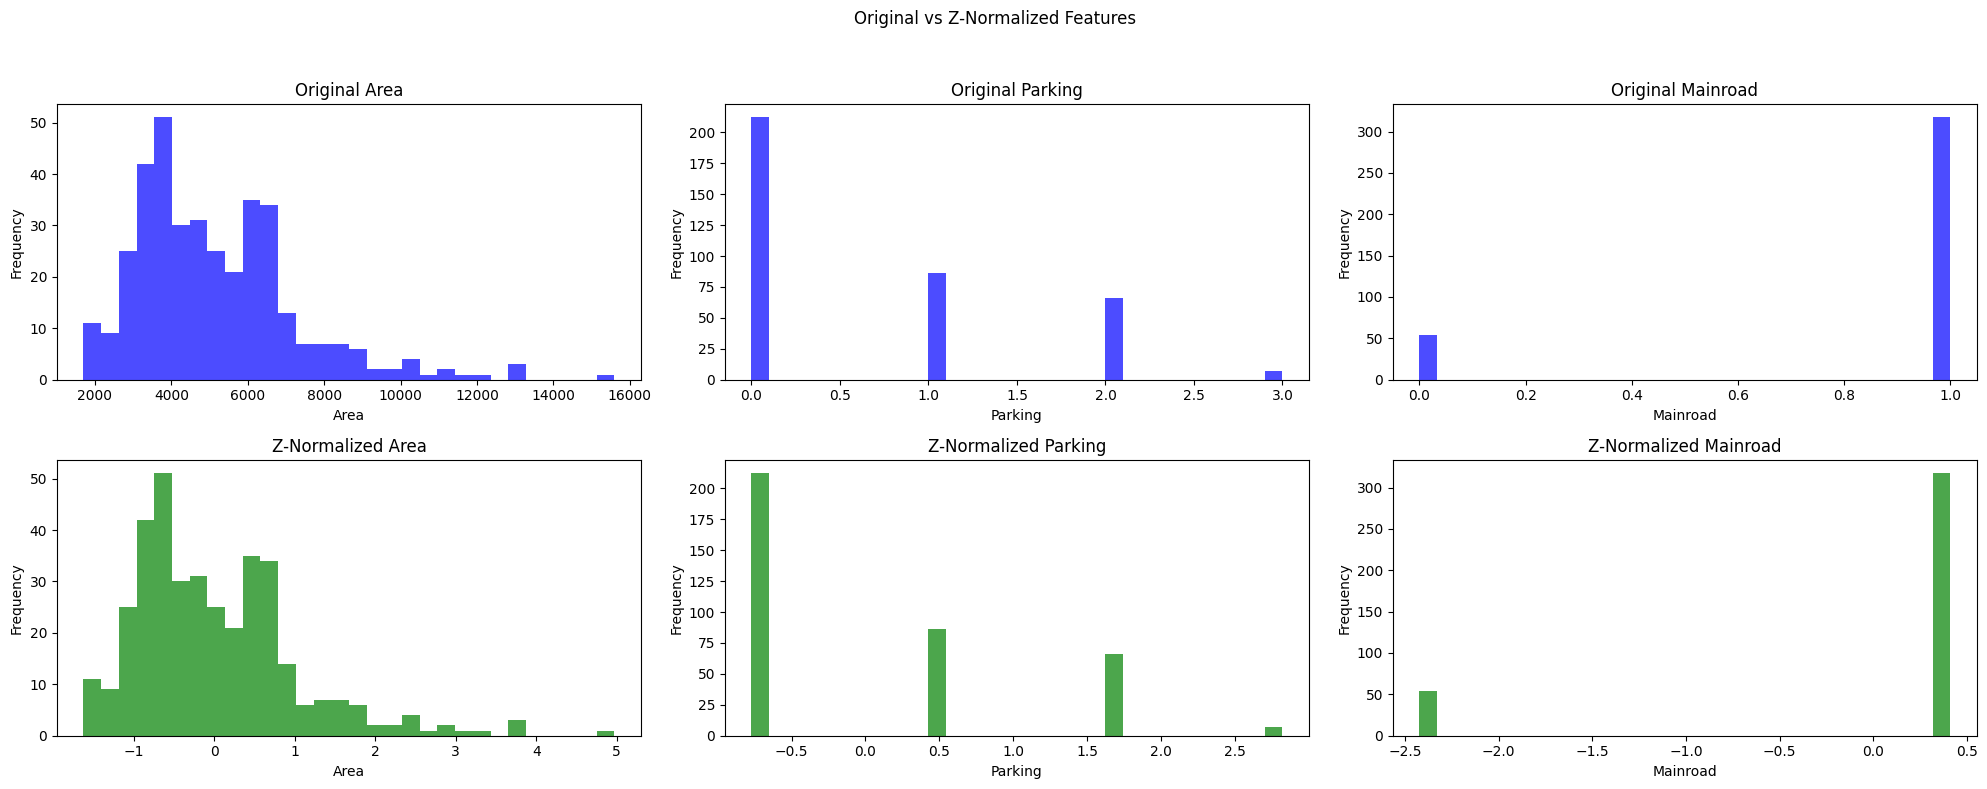

In [ ]:
X_norm, sigma, mu = zscore_normalize_features(X_train[['area', 'parking', 'mainroad']])
area = X_train['area']
parking = X_train['parking']
mainroad = X_train['mainroad']
area_norm = X_norm.iloc[:, 0]
parking_norm = X_norm.iloc[:, 1]
mainroad_norm = X_norm.iloc[:, 2]

# Prepare the feature names and their corresponding data
features = [("Area", area, area_norm),
            ("Parking", parking, parking_norm),
            ("Mainroad", mainroad, mainroad_norm)]

# Create the subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 8))
fig.suptitle("Original vs Z-Normalized Features")

# Loop over each feature and plot histograms
for i, (name, original, normalized) in enumerate(features):
    axs[0, i].hist(original, bins=30, alpha=0.7, color='blue')
    axs[0, i].set_title(f"Original {name}", fontsize=12)
    axs[0, i].set_xlabel(name, fontsize=10)
    axs[0, i].set_ylabel("Frequency", fontsize=10)

    axs[1, i].hist(normalized, bins=30, alpha=0.7, color='green')
    axs[1, i].set_title(f"Z-Normalized {name}", fontsize=12)
    axs[1, i].set_xlabel(name, fontsize=10)
    axs[1, i].set_ylabel("Frequency", fontsize=10)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Transform our X_train and X_test.</br>

In [ ]:
X_train_norm, sigm_x_train, mu_x_train = zscore_normalize_features(X_train)
X_test_norm, sigm_x_test, mu_x_test = zscore_normalize_features(X_test)

Transform our data to numpy arrays.

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train_norm = X_train_norm.to_numpy()
X_test_norm = X_test_norm.to_numpy()

Print the shape of our data variables

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(371, 14) (371,)
(159, 14) (159,)


The cost function for Gradient Descent (Mean Squared Error) is:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{wb}(x^{(i)}) - y^{(i)} \right)^2
$$
</br><br>

$$
f_{wb}(x^{(i)}) = w \cdot x + b
$$
Where:
- J(w, b) is the cost function,
- m is the number of training examples,

In [ ]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

Compute the cost with intial w and b of value of 0s. The cost is high but we will improve it with our gradient model which will get values of w and b that lowers the cost

In [ ]:
temp_w = np.zeros(X_train_norm.shape[1])
temp_b = 0
print(f"Cost for W = {temp_w} and b = {temp_b} {compute_cost(X_train_norm, y_train, temp_w, temp_b)}")

Cost for W = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] and b = 0 1205.7893438889628


We compute the derivatives of the cost function  J(w, b)  with respect to \( w \) and \( b \), as follows:

$$
\frac{dJ(w, b)}{dw} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

$$
\frac{dJ(w, b)}{db} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$




In [ ]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + f_wb * X[i, j]
        dj_db = dj_db + f_wb
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

$$
\text{repeat until convergence:} \left\{
\begin{aligned}
  w & = w - \alpha \frac{\partial J(w, b)}{\partial w} \\
  b & = b - \alpha \frac{\partial J(w, b)}{\partial b}
\end{aligned}
\right.
$$
$\alpha$ is the learning rate



In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

Intialize the parameters and let our algorith decide what values of W and b is most suitable for our function to get the best predictions.

In [ ]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
alpha = 0.01
iterations = 1000
w_final_normal, b_final_normal, J_hist = gradient_descent(X_train_norm, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final_normal:0.2f},{w_final_normal} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {np.dot(X_train_norm[i], w_final_normal) + b_final_normal:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  1180.48
Iteration  100: Cost   189.77
Iteration  200: Cost    65.87
Iteration  300: Cost    49.16
Iteration  400: Cost    46.86
Iteration  500: Cost    46.53
Iteration  600: Cost    46.47
Iteration  700: Cost    46.46
Iteration  800: Cost    46.46
Iteration  900: Cost    46.46
b,w found by gradient descent: 46.29,[ 4.4272683   0.29045834  3.76777235  4.62908167  1.6366974   1.15925491
  1.88917598  1.5809162   3.77189711  1.73939521  2.1732907   0.32873483
  0.83652886 -1.15381166] 
prediction: 43.30, target value: 29.4
prediction: 36.44, target value: 28.7
prediction: 55.74, target value: 33.95
prediction: 46.37, target value: 40.075
prediction: 65.82, target value: 56.525


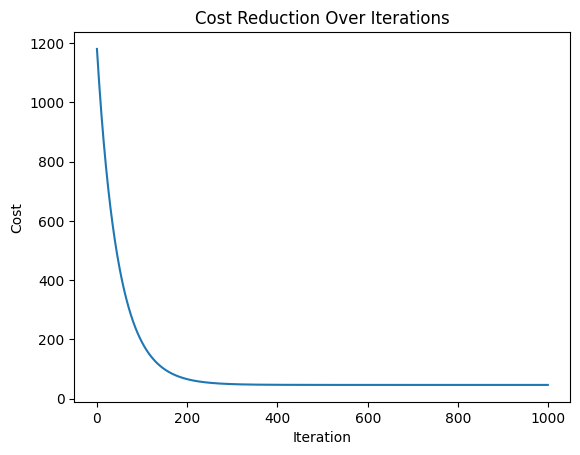

In [ ]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

KDE is an algorithm that estimates the probability density function (PDF) of a continuous variable (in this case, residuals) by smoothing the data points.
It essentially generates a smooth curve (the line) to represent the shape of the data distribution.

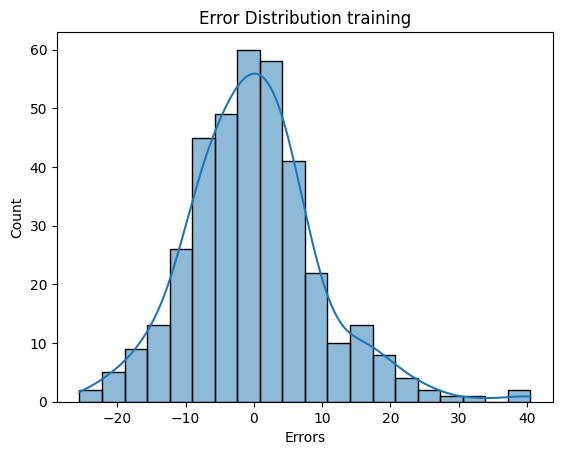

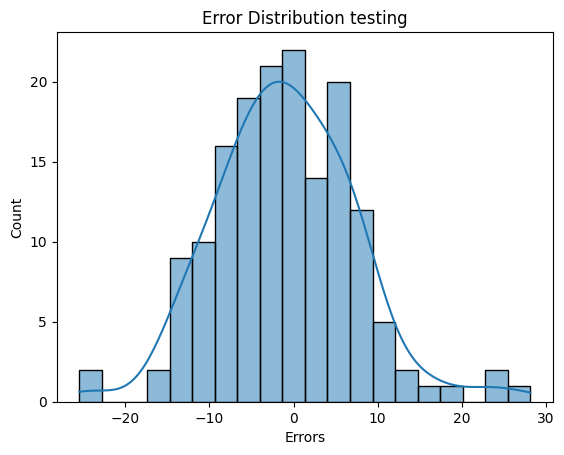

In [ ]:
y_pred = np.dot(X_train_norm, w_final_normal) + b_final_normal
sns.histplot((y_train - y_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
y_pred = np.dot(X_test_norm, w_final_normal) + b_final_normal
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

$$\text{Mean Squared Error} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

$$\text{Normalized Mean Squared Error} = \frac{\sqrt{\text{MSE}}}{\text{Range of } y}$$

$$ \text{Range of y} = y(max) - y(min) $$





NRMSE is used to measure the prediction error of a model, normalized by the range of the target variable, making it easier to compare performance across different datasets or scales.

In [ ]:
y_pred = np.dot(X_test_norm, w_final_normal) + b_final_normal
mse_normal = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_normal)
y_range = np.max(y_test) - np.min(y_test)
nrmse_normal = np.sqrt(mse_normal) / y_range
print(f"NRMSE: {nrmse_normal}")


Mean Squared Error: 69.91145225290353
NRMSE: 0.11375927688136296


$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


In [ ]:
mae_normal = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_normal)
ymax = np.max(y_test)
ymin = np.min(y_test)
print(f"Range of y: {ymax - ymin}")
avg_error_normal = mae_normal / (ymax - ymin)
print(f"Average Error: {avg_error_normal*100:0.2f}%")

Mean Absolute Error: 6.514527231002484
Range of y: 73.5
Average Error: 8.86%


Get the $R^2$ metric of our model
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

But here we are using already build method in sklearn library

In [ ]:
y_pred = np.dot(X_train_norm, w_final_normal) + b_final_normal
r2_training_normal = r2_score(y_train, y_pred)
print("R2 of training data:", r2_training_normal)
y_pred = np.dot(X_test_norm, w_final_normal) + b_final_normal
r2_testing_normal = r2_score(y_test, y_pred)
print("R2 of testing data:", r2_testing_normal)

R2 of training data: 0.6541350625133364
R2 of testing data: 0.6823825178318814


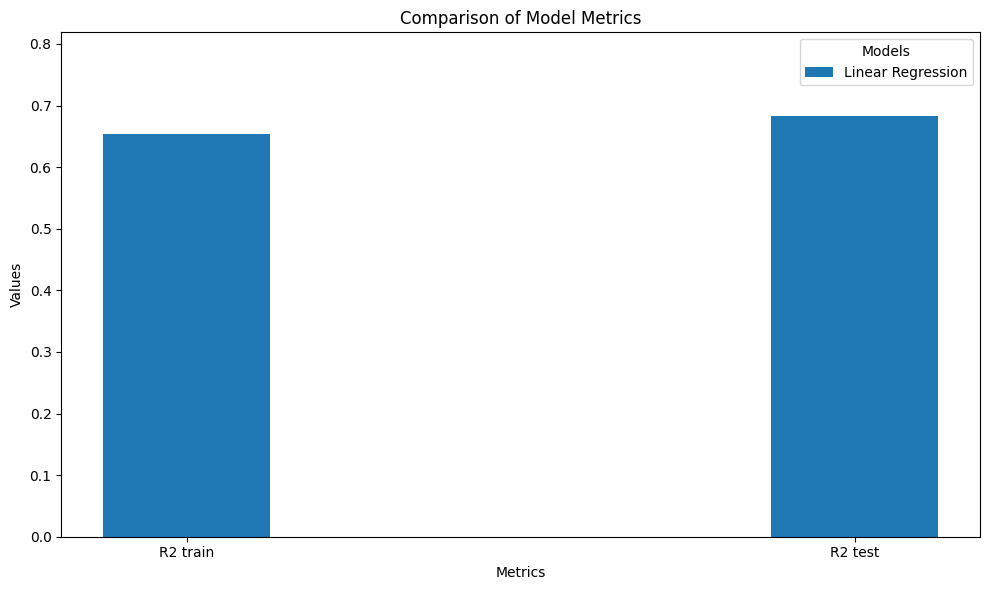

In [ ]:
models = ['Linear Regression']
metrics = ['R2 train','R2 test']
values = {
    'Linear Regression': [r2_training_normal, r2_testing_normal],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, values['Linear Regression'], width, label='Linear Regression')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, max(values['Linear Regression']) * 1.2)
ax.legend(title='Models')

plt.tight_layout()
plt.show()



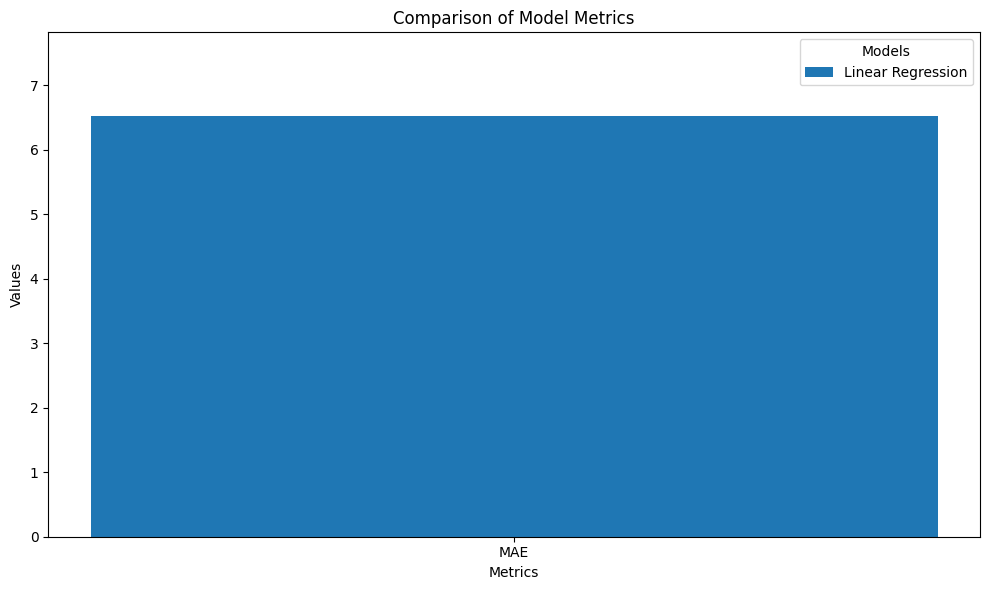

In [ ]:
models = ['Linear Regression']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, values['Linear Regression'], width, label='Linear Regression')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, max(values['Linear Regression']) * 1.2)
ax.legend(title='Models')

plt.tight_layout()
plt.show()



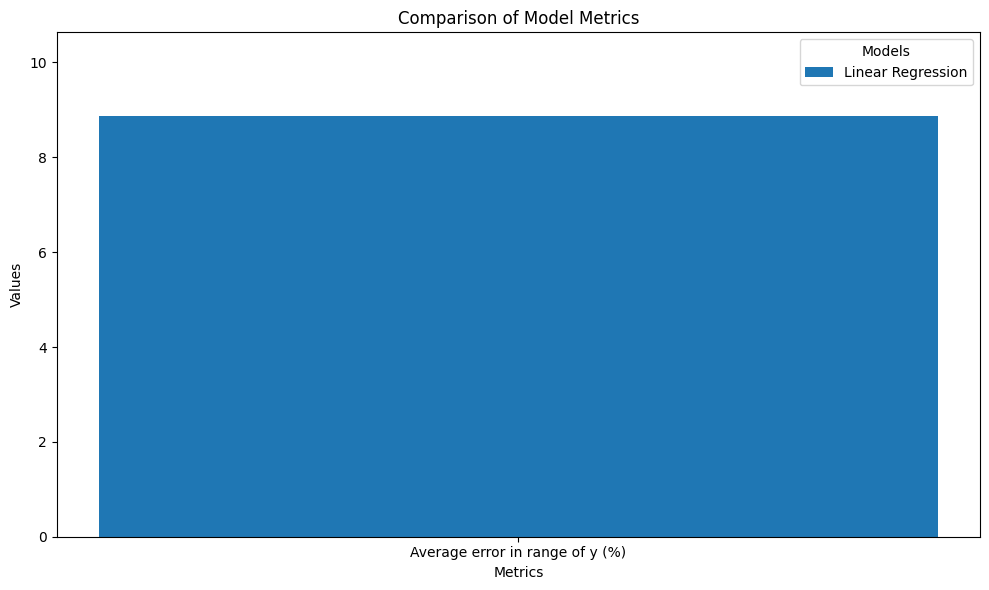

In [ ]:
models = ['Linear Regression']
metrics = ['Average error in range of y (%)']
values = {
    'Linear Regression': [avg_error_normal*100],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, values['Linear Regression'], width, label='Linear Regression')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, max(values['Linear Regression']) * 1.2)
ax.legend(title='Models')

plt.tight_layout()
plt.show()



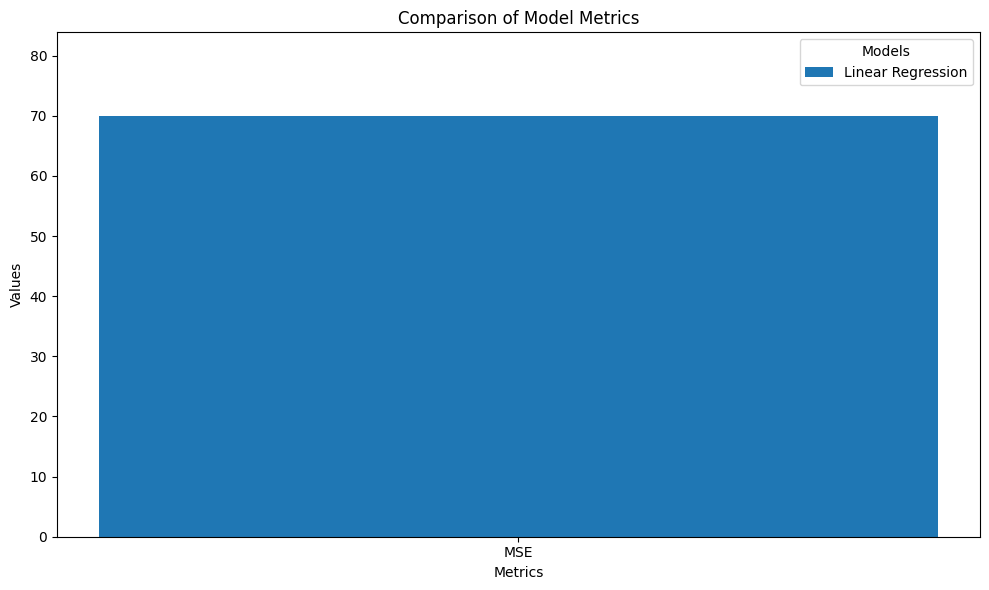

In [ ]:
models = ['Linear Regression']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, values['Linear Regression'], width, label='Linear Regression')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, max(values['Linear Regression']) * 1.2)
ax.legend(title='Models')

plt.tight_layout()
plt.show()



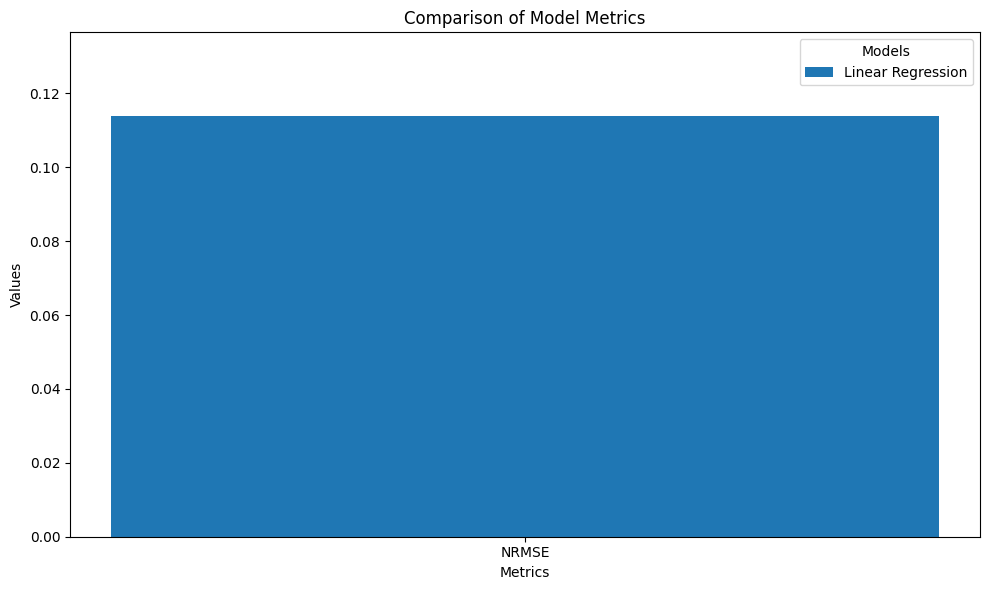

In [ ]:
models = ['Linear Regression']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, values['Linear Regression'], width, label='Linear Regression')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, max(values['Linear Regression']) * 1.2)
ax.legend(title='Models')

plt.tight_layout()
plt.show()

Using polynomialFeatures method built in sklearn to raise our coffient
x the features to higher order power effectively changing our model from linear regression to polynomial regression to capture non linearity in the data which could improve our predictions.

In [ ]:
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train_norm)
X_test_poly = poly.transform(X_test_norm[:, ])

In [ ]:
initial_w = np.zeros(X_train_poly.shape[1])
initial_b = 0.
alpha = 0.01
iterations = 1000
w_final_poly, b_final_poly, J_hist = gradient_descent(X_train_poly, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final_poly:0.2f},{w_final_poly} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {np.dot(X_train_poly[i], w_final_poly) + b_final_poly:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   800.96
Iteration  100: Cost    47.33
Iteration  200: Cost    39.32
Iteration  300: Cost    36.02
Iteration  400: Cost    34.17
Iteration  500: Cost    33.01
Iteration  600: Cost    32.23
Iteration  700: Cost    31.68
Iteration  800: Cost    31.27
Iteration  900: Cost    30.97
b,w found by gradient descent: 5.58,[ 5.5825507   4.66016751  1.00447646  2.14290096  1.93669114  2.87771355
 -2.33059059 -1.06742606 -1.12900845 -0.75804336  3.33707048 -1.86890374
 -1.1192518   1.84776424 -0.89351648 -1.08352579  0.06783991 -0.41270332
 -0.44025366  0.63316629 -1.26712096  0.10940939  0.07136009  0.74178967
 -0.04888287  0.18354237  0.1831391   0.07464248 -0.24089882  0.29626428
 -0.90287311 -1.38116426  0.14363305 -0.12763181 -0.01757442  1.04501246
 -0.71061082  0.79323626 -0.38392422  0.54648193  0.27874278 -0.7763501
  0.90347397 -0.63972525  1.00335952  0.33366817 -0.60011931 -1.53049089
  1.56553916  1.11465306  0.34124944 -0.64278069  0.24969457  0.32010054
  1.5060

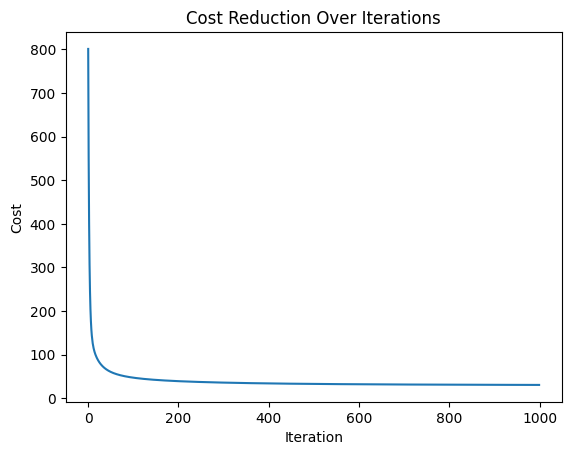

In [ ]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

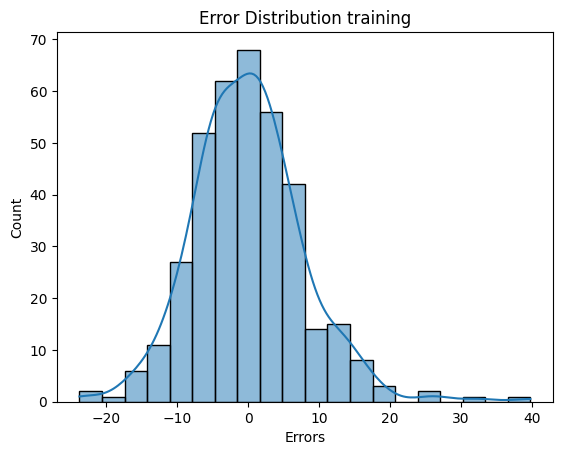

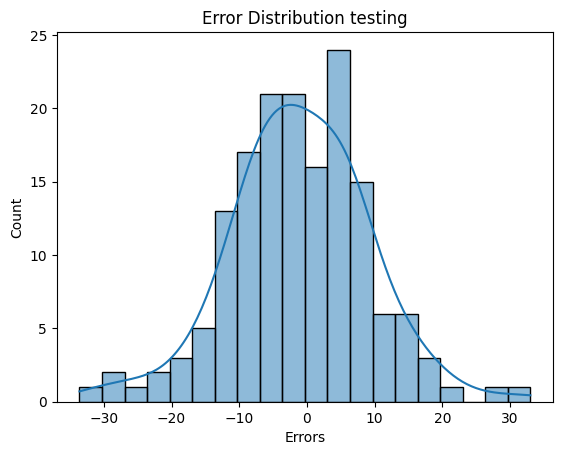

In [ ]:
y_pred = np.dot(X_train_poly, w_final_poly) + b_final_poly
sns.histplot((y_train - y_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
y_pred = np.dot(X_test_poly, w_final_poly) + b_final_poly
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_pred = np.dot(X_test_poly, w_final_poly) + b_final_poly
mse_poly = mean_squared_error(y_test, y_pred)
nrmse_poly = np.sqrt(mse_poly) / (np.max(y_test) - np.min(y_test))
print("Mean Squared Error:", mse_poly)
print(f"NRMSE: {nrmse_poly}")
mae_poly = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_poly)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_poly = (mae_poly / range_of_y)
print(f"Average Error: {avg_error_poly*100:0.2f}%")
y_pred = np.dot(X_train_poly, w_final_poly) + b_final_poly
r2_training_poly = r2_score(y_train, y_pred)
print("R2 score on training data:",r2_training_poly)
y_pred = np.dot(X_test_poly, w_final_poly) + b_final_poly
r2_testing_poly = r2_score(y_test, y_pred)
print("R2 score on testing data:",r2_testing_poly)


Mean Squared Error: 107.92433021854163
NRMSE: 0.14134236113506934
Mean Absolute Error: 8.017173340079005
Range of y: 73.5
Average Error: 10.91%
R2 score on training data: 0.7711936807578208
R2 score on testing data: 0.5096847093850758


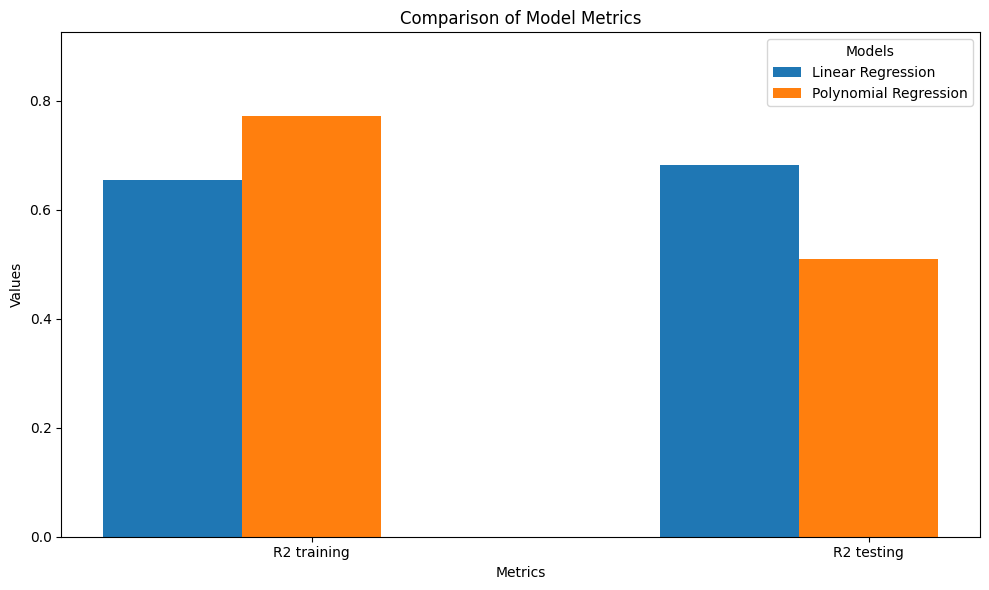

In [ ]:
models = ['Linear Regression', 'Polynomial Regression']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


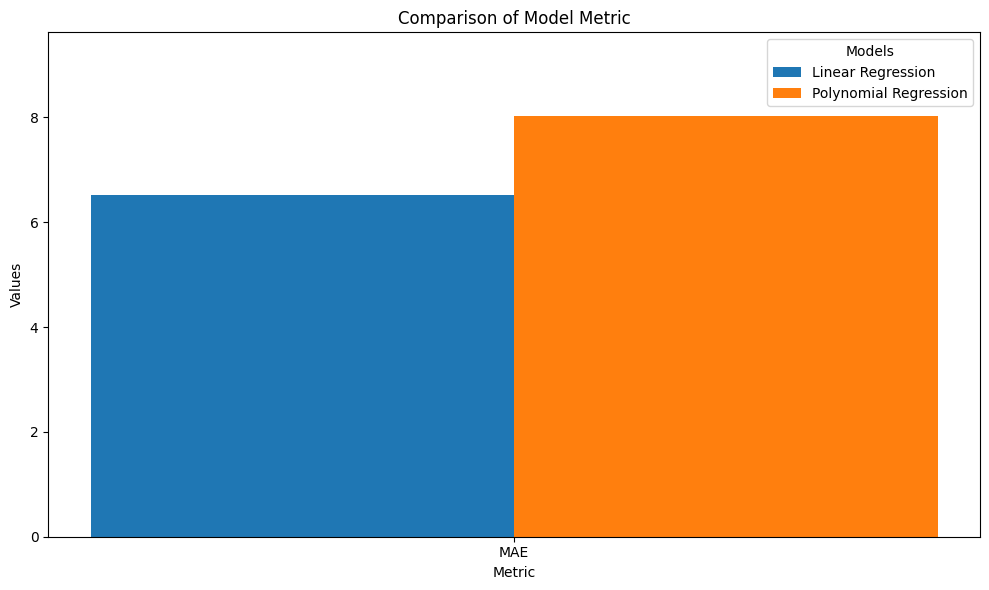

In [ ]:
models = ['Linear Regression', 'Polynomial Regression']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


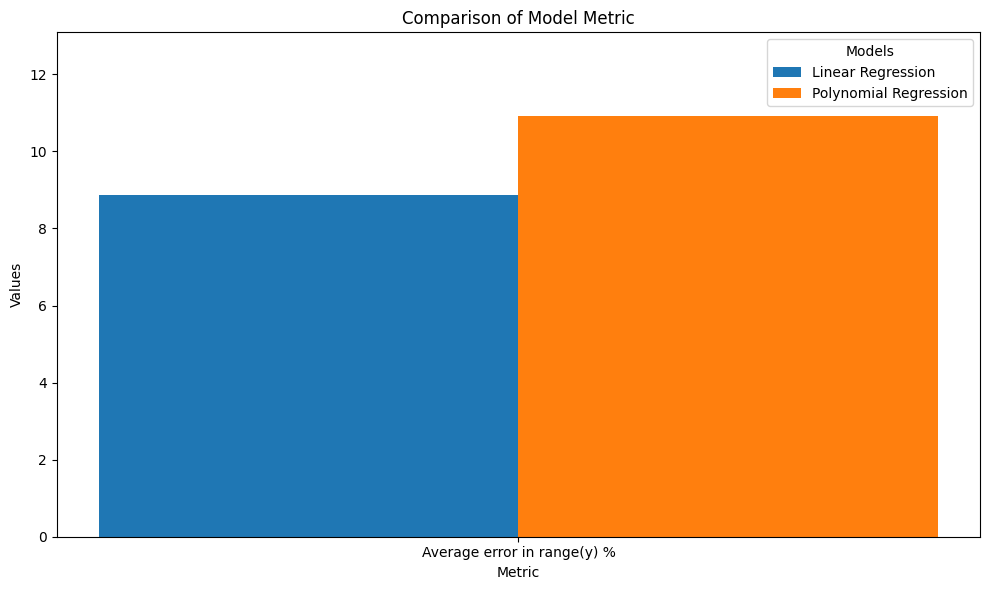

In [ ]:
models = ['Linear Regression', 'Polynomial Regression']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


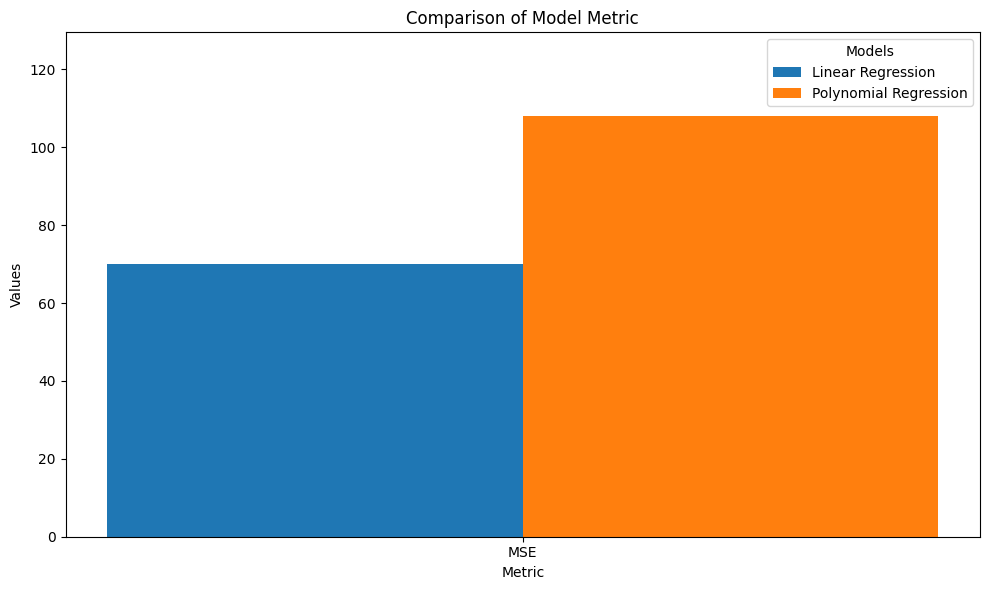

In [ ]:
models = ['Linear Regression', 'Polynomial Regression']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


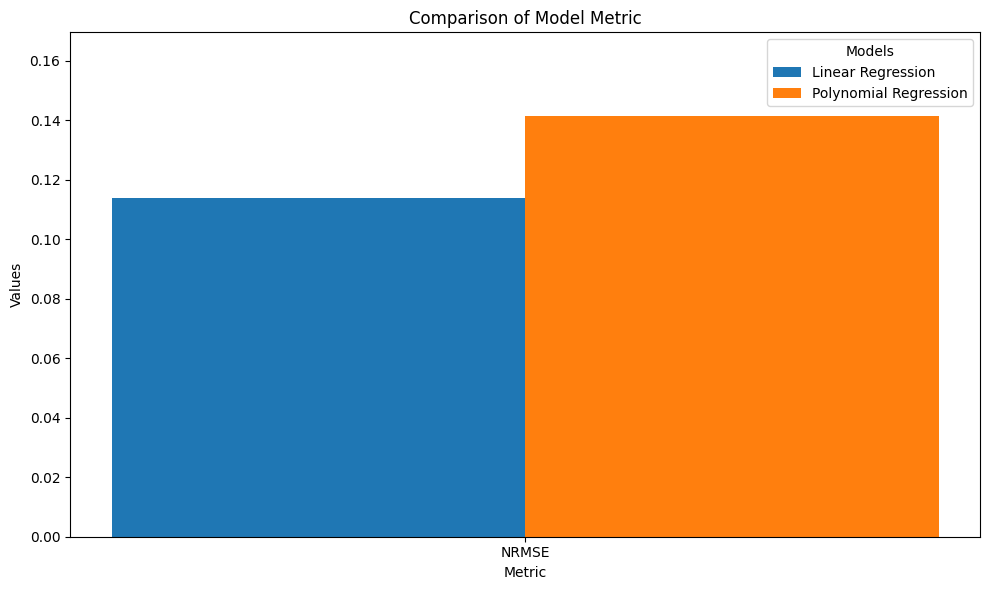

In [ ]:
models = ['Linear Regression', 'Polynomial Regression']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


The cost function for Gradient Descent with regulation (Mean Squared Error) is:

$$
J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2
$$
</br><br>

$$
f_{wb}(x^{(i)}) = w \cdot x + b
$$
Where:
- J(w, b) is the cost function,
- m is the number of data points,

In [ ]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m  = X.shape[0]
    n  = w.shape[0]
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost = (lambda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
    return total_cost

We compute the derivatives of the cost function  J(w, b)  with respect to \( w \) and \( b \), as follows:

$$
\frac{dJ(w, b)}{dw} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x^{(i)} + \frac{\lambda}{m} w_j
$$

$$
\frac{dJ(w, b)}{db} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$




In [ ]:
def compute_gradient_reg(X, y, w, b, lambda_):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        f_wb = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + f_wb * X[i, j]
        dj_db = dj_db + f_wb
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

$$
\text{repeat until convergence:} \left\{
\begin{aligned}
  w & = w - \alpha \frac{\partial J(w, b)}{\partial w} \\
  b & = b - \alpha \frac{\partial J(w, b)}{\partial b}
\end{aligned}
\right.
$$



In [ ]:
def gradient_descent_reg(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = compute_gradient_reg(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history

In [ ]:
initial_w = np.zeros(X_train_poly.shape[1])
initial_b = 0.
alpha = 0.01
iterations = 1000
lambda_ = 110
w_final_poly_reg, b_final_poly_reg, J_hist = gradient_descent_reg(X_train_poly, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg,alpha, iterations, lambda_)
print(f"b,w found by gradient descent: {b_final_poly_reg:0.2f},{w_final_poly_reg} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {np.dot(X_train_poly[i], w_final_poly_reg) + b_final_poly_reg:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   800.97   
Iteration  100: Cost    50.64   
Iteration  200: Cost    43.60   
Iteration  300: Cost    41.09   
Iteration  400: Cost    39.83   
Iteration  500: Cost    39.08   
Iteration  600: Cost    38.59   
Iteration  700: Cost    38.24   
Iteration  800: Cost    37.96   
Iteration  900: Cost    37.73   
b,w found by gradient descent: 14.28,[ 3.34785463e+00  2.63647889e+00  1.02072800e+00  9.50836582e-01
  1.43297701e+00  1.72931863e+00 -1.09859861e+00 -2.20724478e-01
 -6.27320135e-01  5.60310165e-01  1.54035886e+00 -5.52289099e-01
 -5.86874891e-01  1.28833096e+00 -7.96547907e-01 -9.64817104e-02
 -3.03539803e-02  1.85547539e-01 -3.99867928e-01  1.81671203e-01
 -7.62594265e-01 -2.84692451e-02  7.90537078e-02  3.11857384e-01
 -2.07953008e-01  4.22089381e-01  5.31870045e-02  9.22433148e-02
 -1.42420858e-01  4.18732711e-01 -5.81248317e-01 -6.36512739e-01
  2.26808131e-01 -1.34636984e-01  1.72580572e-02  6.09440094e-01
 -4.93353594e-01  3.96409558e-01 -2.61341929e-01

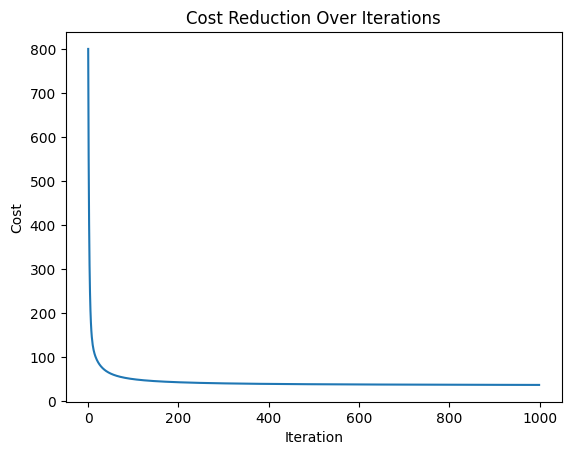

In [ ]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

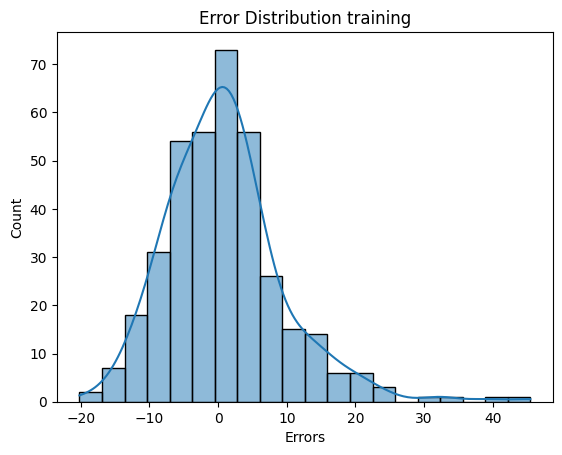

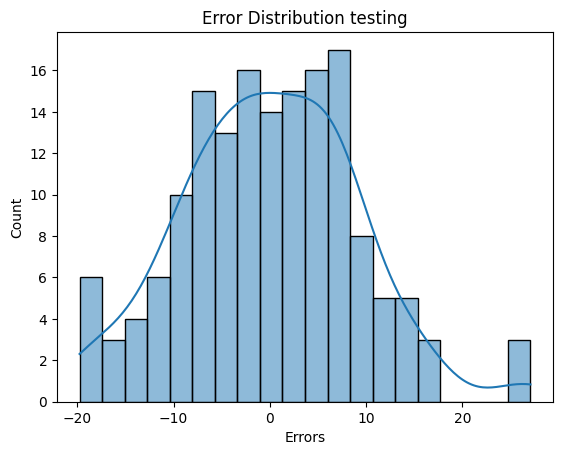

In [ ]:
y_pred = np.dot(X_train_poly, w_final_poly_reg) + b_final_poly_reg
sns.histplot((y_train - y_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
y_pred = np.dot(X_test_poly, w_final_poly_reg) + b_final_poly_reg
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_pred = np.dot(X_test_poly, w_final_poly_reg) + b_final_poly_reg
mse_poly_reg = mean_squared_error(y_test, y_pred)
nrmse_poly_reg = np.sqrt(mse_poly_reg) / (np.max(y_test) - np.min(y_test))
print("Mean Squared Error:", mse_poly_reg)
print(f"NRMSE: {nrmse_poly}")
mae_poly_reg = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_poly_reg)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_poly_reg = (mae_poly_reg / range_of_y)
print(f"Average Error: {avg_error_poly_reg*100:0.2f}%")

Mean Squared Error: 82.06838757428423
NRMSE: 0.14134236113506934
Mean Absolute Error: 7.218433678762001
Range of y: 73.5
Average Error: 9.82%


In [ ]:
y_pred = np.dot(X_train_poly, w_final_poly_reg) + b_final_poly_reg
r2_training_poly_reg = r2_score(y_train, y_pred)
print("R2 score on training data: ",r2_training_poly_reg)
y_pred = np.dot(X_test_poly, w_final_poly_reg) + b_final_poly_reg
r2_test_poly_reg = r2_score(y_test, y_pred)
print("R2 score on testing data: ",r2_test_poly_reg)

R2 score on training data:  0.7218157684232155
R2 score on testing data:  0.6271518644377911


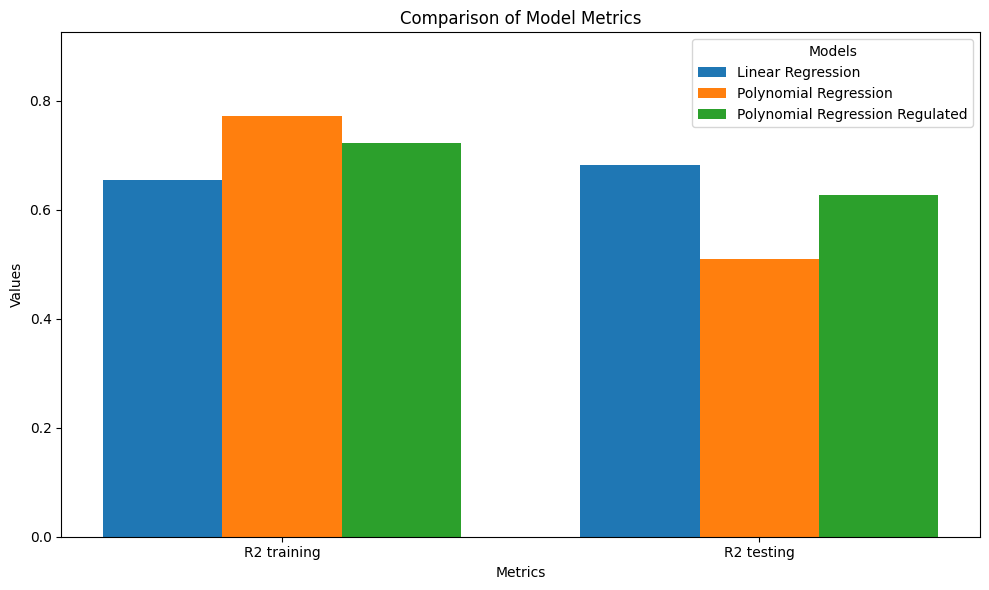

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


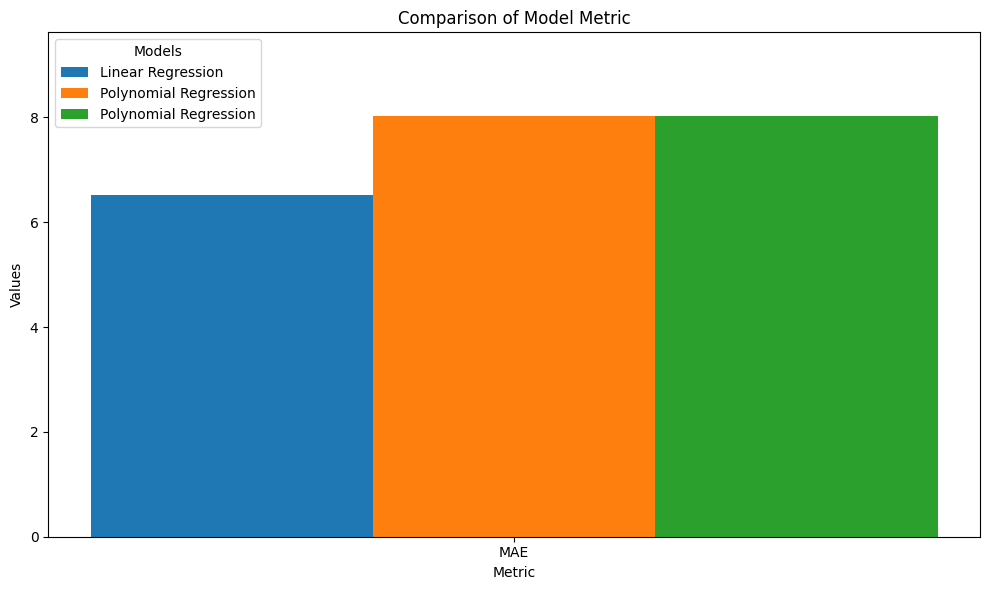

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly],
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


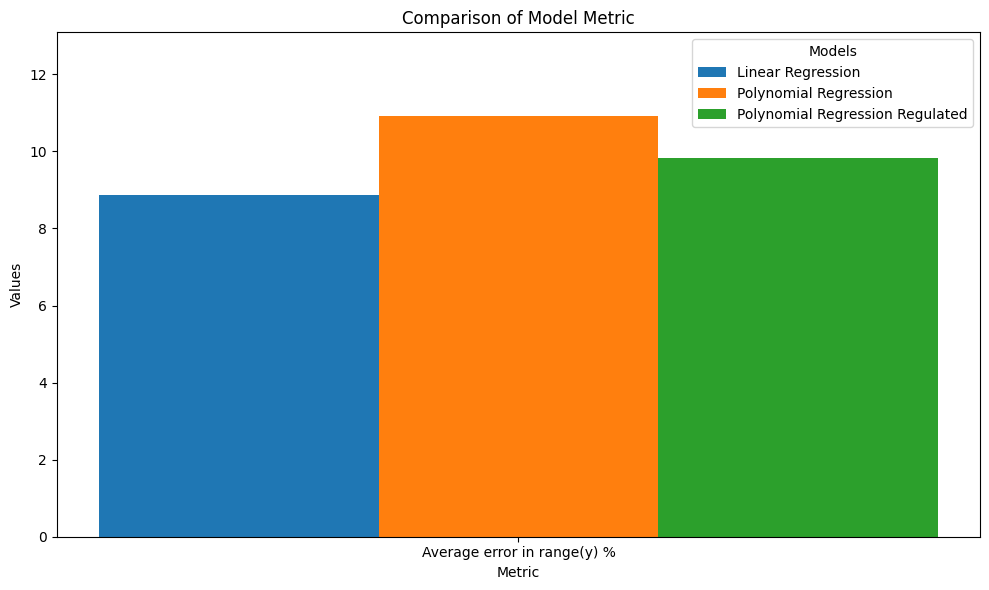

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


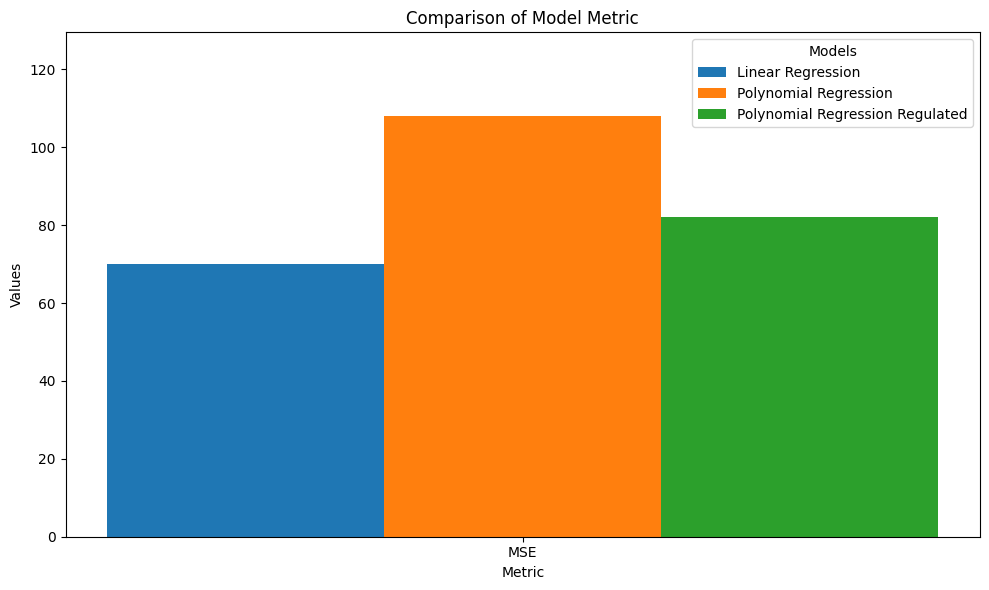

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


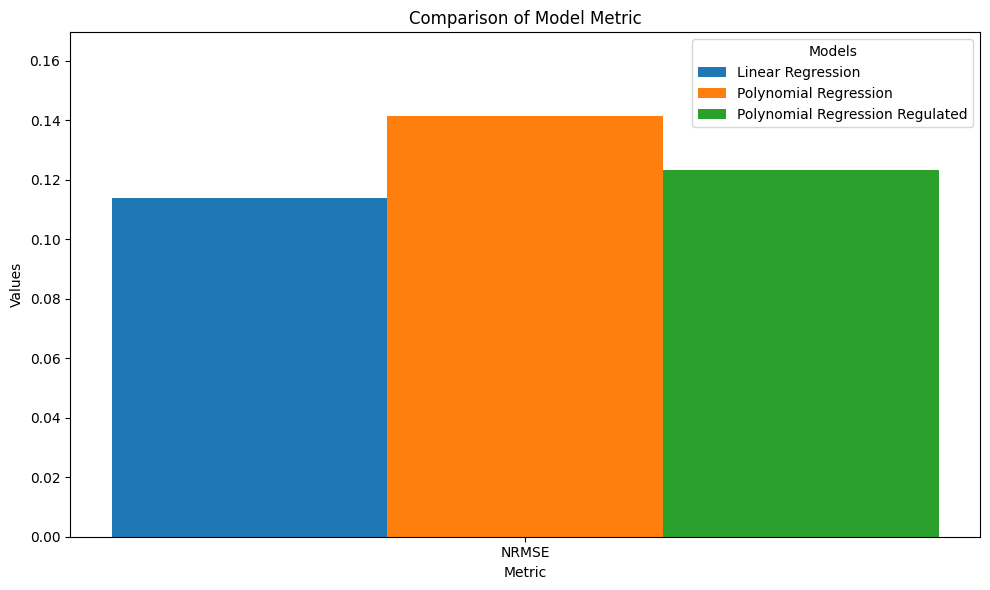

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


Trying to regulate first parameters to check if it might improve our metrics.

In [ ]:
initial_w = np.zeros(X_train_norm.shape[1])
initial_b = 0.
alpha = 0.01
iterations = 1000
lambda_ = 100
w_final_normal_reg, b_final_normal_reg, J_hist = gradient_descent_reg(X_train_norm, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg,alpha, iterations, lambda_)
print(f"b,w found by gradient descent: {b_final_normal_reg:0.2f},{w_final_normal_reg} ")
m,_ = X_test.shape
for i in range(5):
    print(f"prediction: {np.dot(X_test_norm[i], w_final_normal_reg) + b_final_normal_reg:0.2f}, target value: {y_test[i]}")

Iteration    0: Cost  1180.48   
Iteration  100: Cost   191.71   
Iteration  200: Cost    67.49   
Iteration  300: Cost    50.75   
Iteration  400: Cost    48.43   
Iteration  500: Cost    48.09   
Iteration  600: Cost    48.03   
Iteration  700: Cost    48.02   
Iteration  800: Cost    48.02   
Iteration  900: Cost    48.01   
b,w found by gradient descent: 46.29,[ 3.6507506   0.84032439  3.20401864  3.71155451  1.61572426  1.23868827
  1.4411284   1.24976262  3.28588993  1.67685511  1.87553396  0.54755841
  0.66646656 -1.17544377] 
prediction: 43.28, target value: 38.5
prediction: 35.54, target value: 31.15
prediction: 36.99, target value: 33.95
prediction: 70.87, target value: 79.1
prediction: 35.61, target value: 40.6


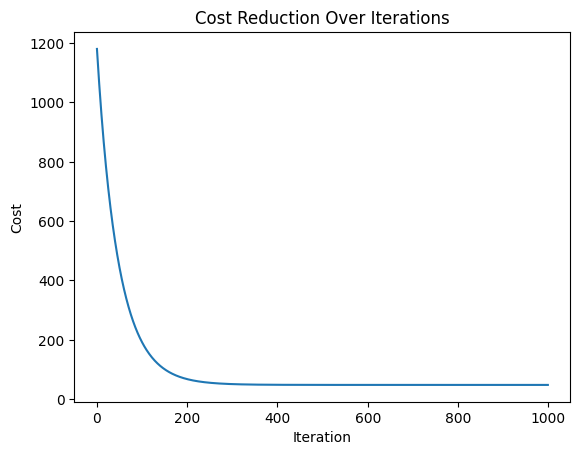

In [ ]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

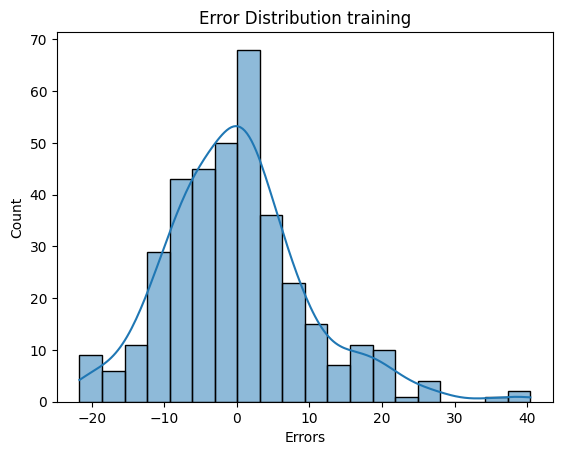

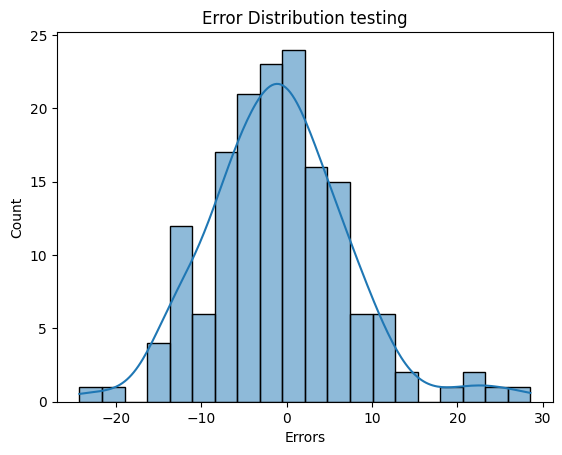

In [ ]:
y_pred = np.dot(X_train_norm, w_final_normal_reg) + b_final_normal_reg
sns.histplot((y_train - y_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
y_pred = np.dot(X_test_norm, w_final_normal_reg) + b_final_normal_reg
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_pred = np.dot(X_test_norm, w_final_normal_reg) + b_final_normal_reg
mse_normal_reg = mean_squared_error(y_test, y_pred)
nrmse_normal_reg = np.sqrt(mse_normal_reg) / (np.max(y_test) - np.min(y_test))
print("Mean Squared Error:", mse_normal_reg)
print(f"NRMSE: {nrmse_normal_reg}")
mae_normal_reg = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_normal_reg)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_normal_reg = (mae_normal_reg / range_of_y)
print(f"Average Error: {avg_error_normal_reg*100:0.2f}%")
y_pred = np.dot(X_train_norm, w_final_normal_reg) + b_final_normal_reg
r2_training_normal_reg = r2_score(y_train, y_pred)
print("R2 score on training data: ",r2_training_normal_reg)
y_pred = np.dot(X_test_norm, w_final_normal_reg) + b_final_normal_reg
r2_testing_normal_reg = r2_score(y_test, y_pred)
print("R2 score on testing data: ",r2_testing_normal_reg)

Mean Squared Error: 67.37196602324181
NRMSE: 0.11167405121717405
Mean Absolute Error: 6.228588619667721
Range of y: 73.5
Average Error: 8.47%
R2 score on training data:  0.6432199968242701
R2 score on testing data:  0.6939197581018726


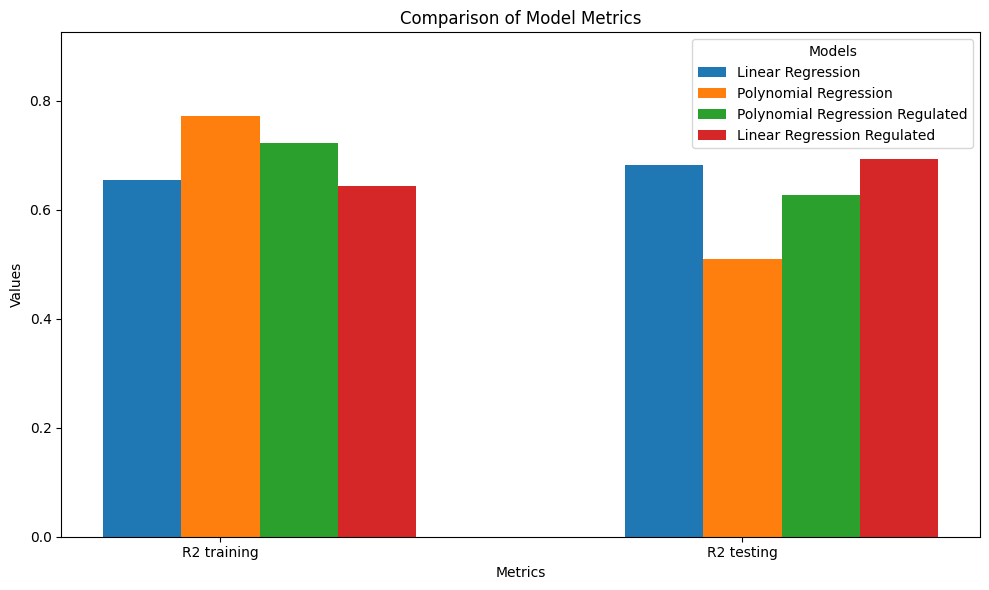

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated','Linear Regression Regulated']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
    'Linear Regression Regulated': [r2_training_normal_reg,r2_testing_normal_reg],
}
x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


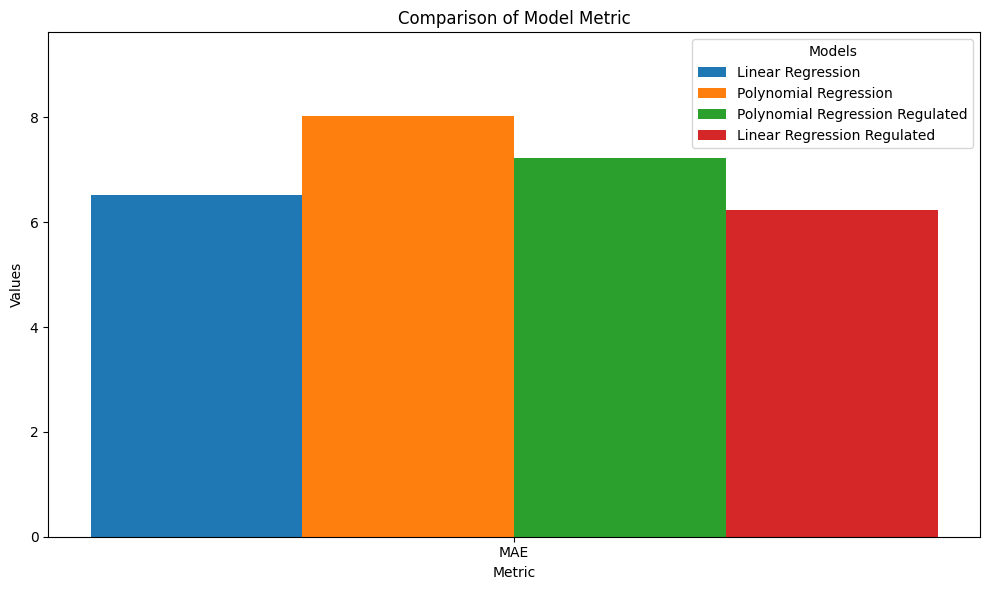

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly_reg],
    'Linear Regression Regulated': [mae_normal_reg],
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


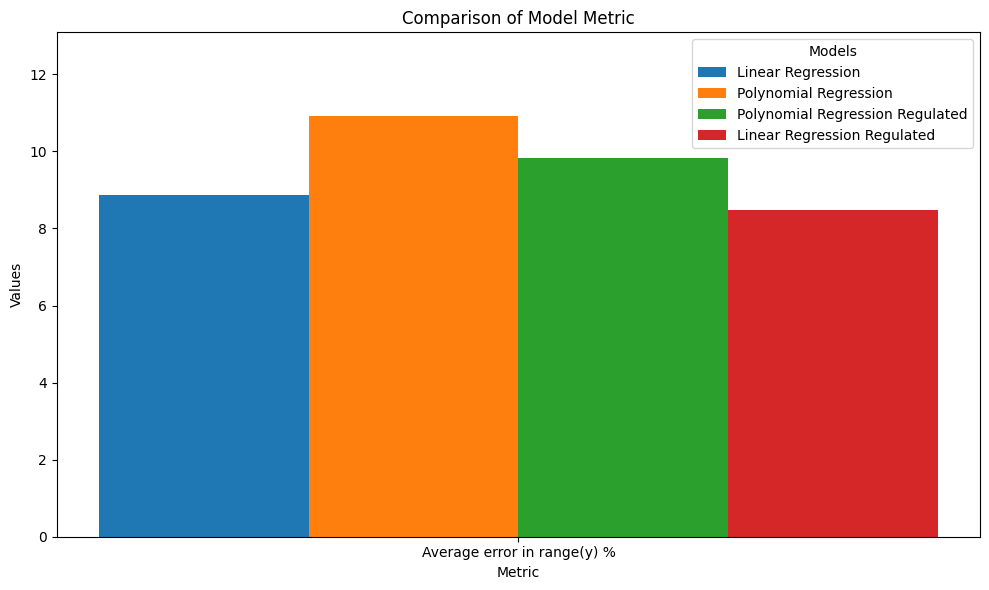

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
    'Linear Regression Regulated': [avg_error_normal_reg*100],
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


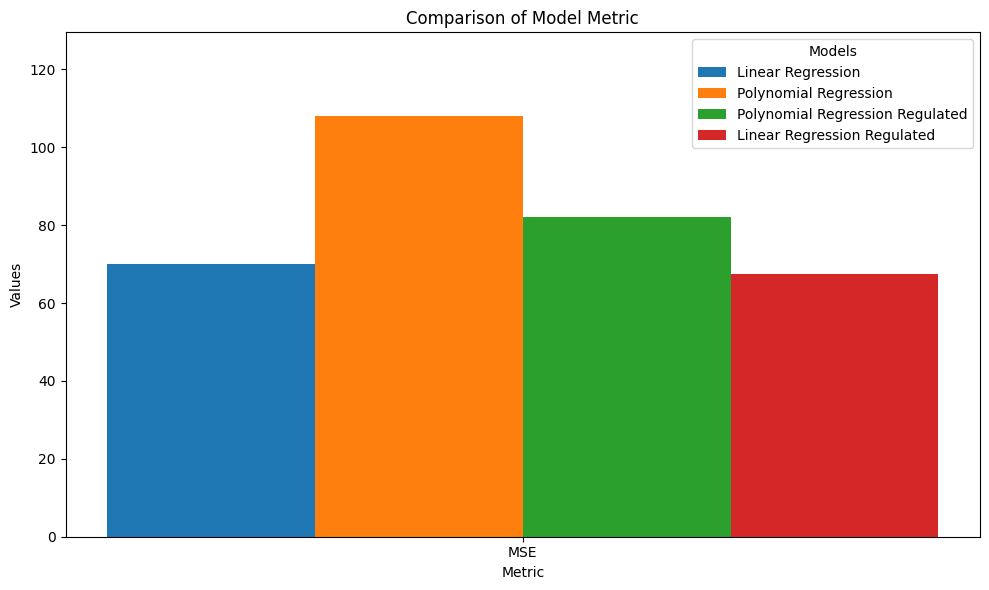

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
    'Linear Regression Regulated': [mse_normal_reg]
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


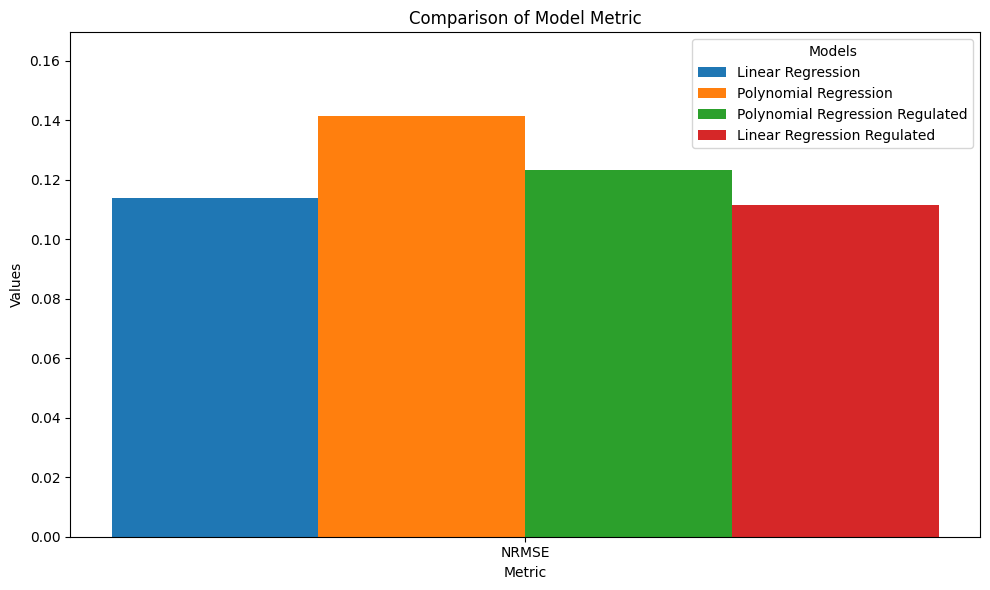

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
    'Linear Regression Regulated': [nrmse_normal_reg]
}
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


Recursive Feature Elimination (RFE) is a feature selection method that iteratively fits a model and removes the least important features based on their weights or coefficients.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
selector = RFE(estimator=model, n_features_to_select=9)
selector = selector.fit(X_train_norm, y_train)
selected_features = selector.support_
print("Selected features:", selected_features)
X_train_selected = X_train_norm[:, selected_features]
X_test_selected = X_test_norm[:, selected_features]
feature_ranking = selector.ranking_
print("Feature ranking:", feature_ranking)

Selected features: [ True False  True  True  True False  True False  True  True  True False
 False  True]
Feature ranking: [1 6 1 1 1 3 1 2 1 1 1 5 4 1]


In [ ]:
initial_w = np.zeros(X_train_selected.shape[1])
initial_b = 0.
alpha = 0.01
iterations = 1000
lambda_ = 100
w_final_selected, b_final_selected, J_hist = gradient_descent_reg(X_train_selected, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg,alpha, iterations, lambda_)
print(f"b,w found by gradient descent: {b_final_selected:0.2f},{w_final_selected} ")
m,_ = X_test.shape
for i in range(5):
    print(f"prediction: {np.dot(X_test_selected[i], w_final_selected) + b_final_selected:0.2f}, target value: {y_test[i]}")

Iteration    0: Cost  1181.15   
Iteration  100: Cost   193.47   
Iteration  200: Cost    68.95   
Iteration  300: Cost    52.33   
Iteration  400: Cost    50.08   
Iteration  500: Cost    49.77   
Iteration  600: Cost    49.73   
Iteration  700: Cost    49.72   
Iteration  800: Cost    49.72   
Iteration  900: Cost    49.72   
b,w found by gradient descent: 46.29,[ 3.78644277  3.53298997  4.00771626  1.63182841  1.88890915  3.18547554
  1.79351172  1.91215826 -1.8162131 ] 
prediction: 41.19, target value: 38.5
prediction: 35.58, target value: 31.15
prediction: 37.83, target value: 33.95
prediction: 71.31, target value: 79.1
prediction: 35.38, target value: 40.6


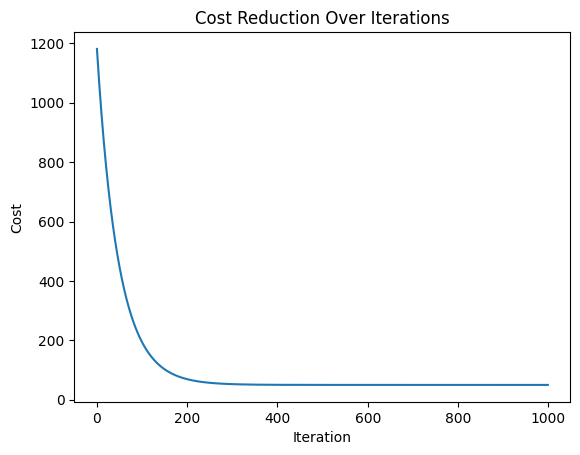

In [ ]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

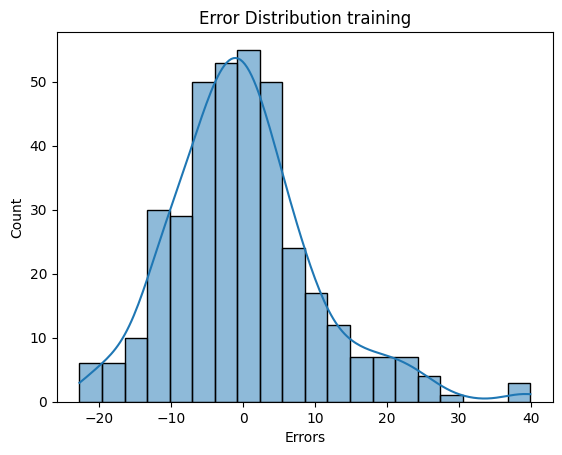

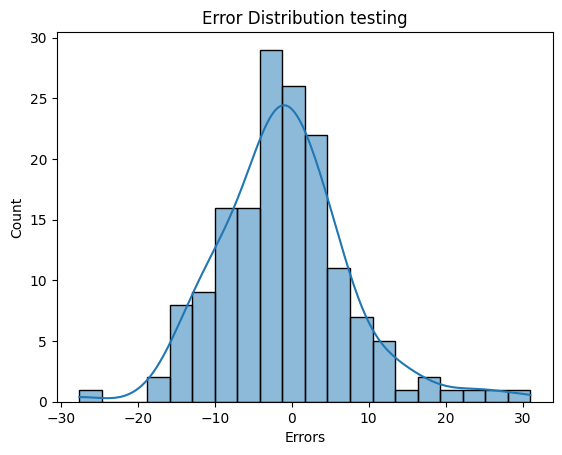

In [ ]:
y_pred = np.dot(X_train_selected, w_final_selected) + b_final_selected
sns.histplot((y_train - y_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
y_pred = np.dot(X_test_selected, w_final_selected) + b_final_selected
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_train_pred = np.dot(X_train_selected, w_final_selected) + b_final_selected
r2_training_selected = r2_score(y_train, y_train_pred)
y_test_pred = np.dot(X_test_selected, w_final_selected) + b_final_selected
mse_selected = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse_selected)
nrmse_selected = np.sqrt(mse_selected) / (np.max(y_test) - np.min(y_test))
print(f"NRMSE: {nrmse_selected}")
mae_selected = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae_selected)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_selected = (mae_selected / range_of_y)
print(f"Average Error: {avg_error_selected*100:0.2f}%")
r2_testing_selected = r2_score(y_test, y_test_pred)
print("R2 score on training data: ", r2_training_selected)
print("R2 score on testing data: ", r2_testing_selected)


Mean Squared Error: 72.9296225402649
NRMSE: 0.11618890099162052
Mean Absolute Error: 6.363205621120651
Range of y: 73.5
Average Error: 8.66%
R2 score on training data:  0.6305688883355218
R2 score on testing data:  0.6686705490980818


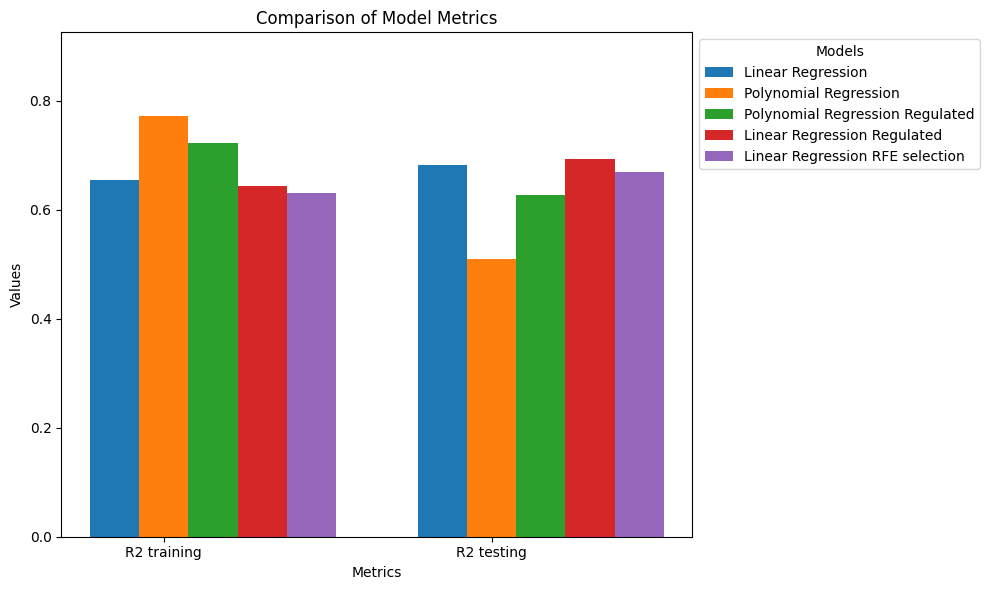

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated','Linear Regression Regulated', 'Linear Regression RFE selection']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
    'Linear Regression Regulated': [r2_training_normal_reg,r2_testing_normal_reg],
    'Linear Regression RFE selection': [r2_training_selected, r2_testing_selected]
}
x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


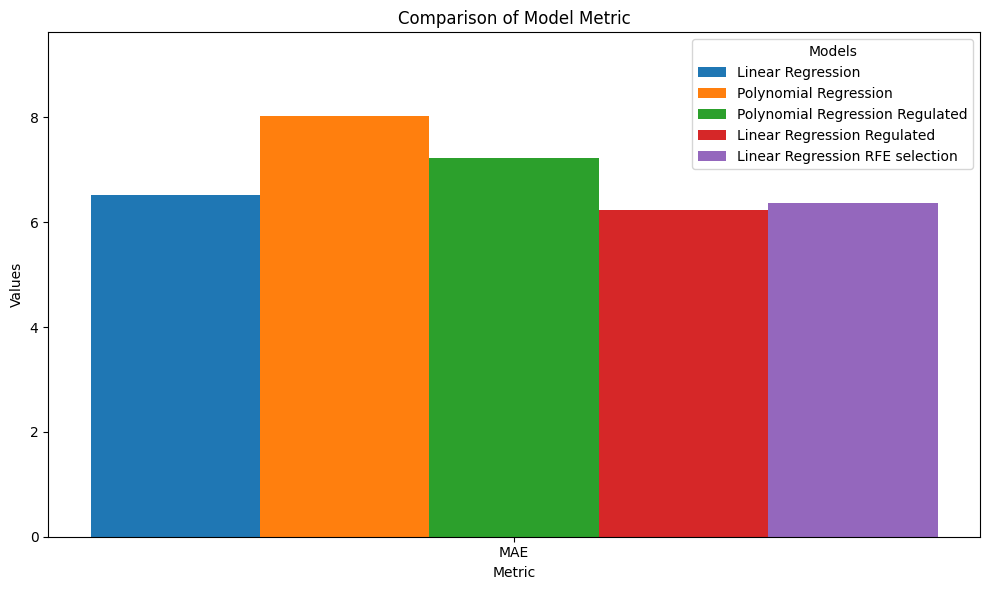

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly_reg],
    'Linear Regression Regulated': [mae_normal_reg],
    'Linear Regression RFE selection': [mae_selected]
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


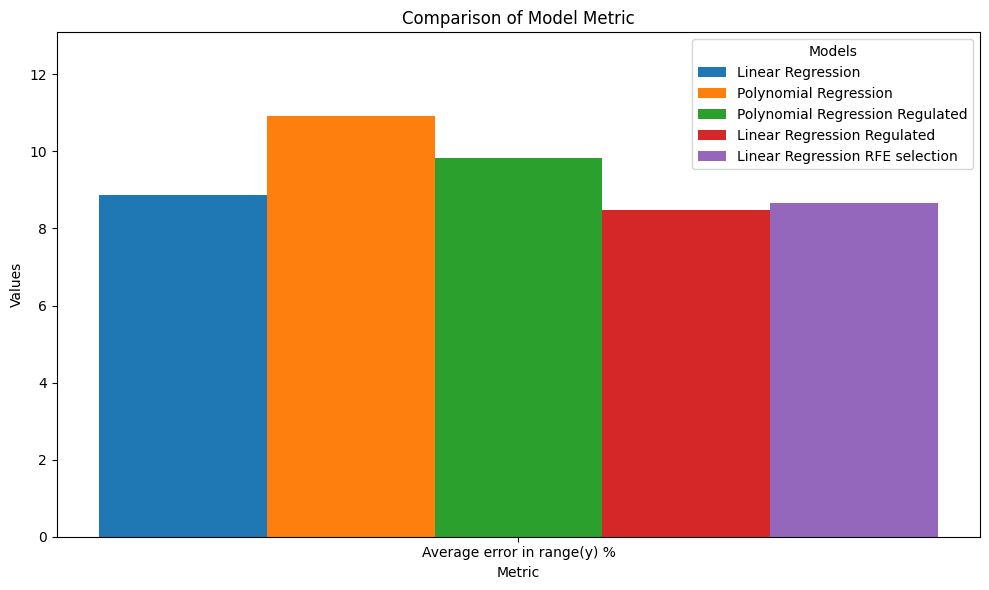

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
    'Linear Regression Regulated': [avg_error_normal_reg*100],
    'Linear Regression RFE selection': [avg_error_selected*100]
}


x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


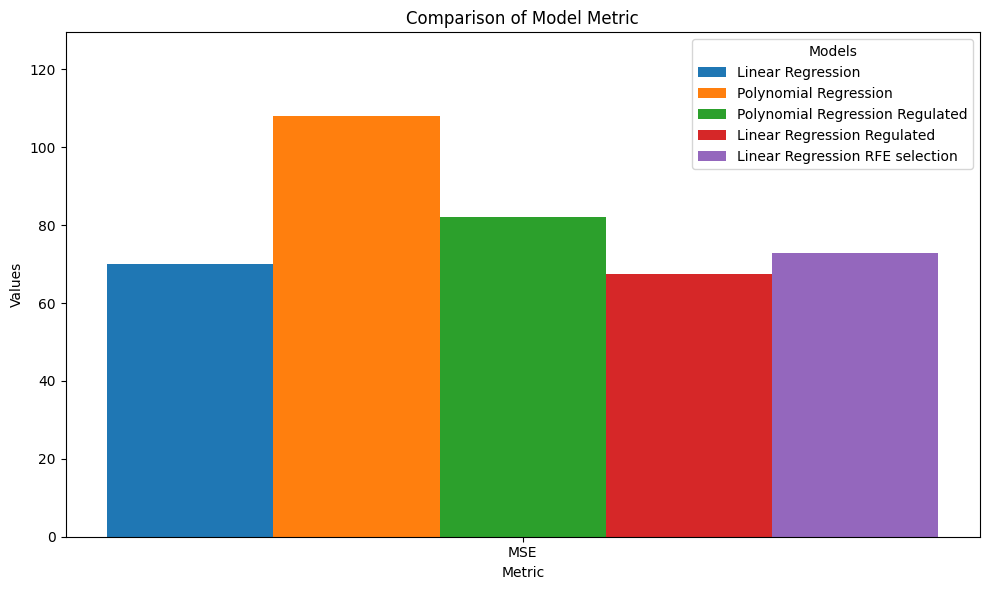

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
    'Linear Regression Regulated': [mse_normal_reg],
    'Linear Regression RFE selection': [mse_selected]
}
x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


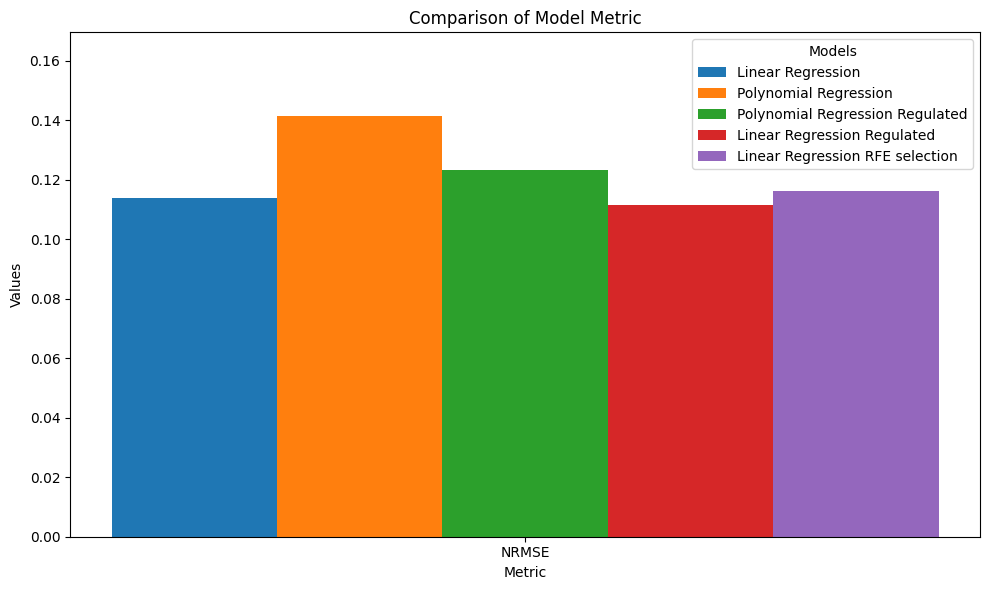

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
    'Linear Regression Regulated': [nrmse_normal_reg],
    'Linear Regression RFE selection': [nrmse_selected]
}
x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)
X_train_selected_poly = poly.fit_transform(X_train_selected)
X_test_selected_poly = poly.transform(X_test_selected[:, ])

In [ ]:
initial_w = np.zeros(X_train_selected_poly.shape[1])
initial_b = 0.
alpha = 0.01
iterations = 1000
lambda_ = 100
w_final_poly_selected, b_final_poly_selected, J_hist = gradient_descent_reg(X_train_selected_poly, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg,alpha, iterations, lambda_)
print(f"b,w found by gradient descent: {b_final_poly_selected:0.2f},{w_final_poly_selected} ")
m,_ = X_test.shape
for i in range(5):
    print(f"prediction: {np.dot(X_test_selected_poly[i], w_final_poly_selected) + b_final_poly_selected:0.2f}, target value: {y_test[i]}")

Iteration    0: Cost   936.08   
Iteration  100: Cost    71.72   
Iteration  200: Cost    59.31   
Iteration  300: Cost    54.57   
Iteration  400: Cost    52.06   
Iteration  500: Cost    50.50   
Iteration  600: Cost    49.44   
Iteration  700: Cost    48.65   
Iteration  800: Cost    48.04   
Iteration  900: Cost    47.53   
b,w found by gradient descent: 20.45,[ 4.99125945e+00  3.03156331e+00  1.20749461e+00  2.06986229e+00
  2.38435657e+00 -3.31841582e-01 -2.52485492e-01  1.74786875e+00
 -1.44990404e+00 -3.23348781e+00 -2.16254689e-03  4.02128572e-01
 -6.46083637e-01  4.01185318e-01  4.17141700e-01 -1.02513434e-01
 -2.87127075e-01  3.49684587e-01 -4.10044131e-02  1.76929466e+00
 -1.46226230e-02  1.11968425e+00 -3.33307510e-01  1.25761029e+00
  5.28362507e-01  4.00012585e-03  3.48490959e-01  1.57677380e+00
  4.87516083e-03 -4.04131441e-01  2.92492585e-01  3.57814893e-01
 -2.21873941e-02  8.24482583e-01  1.98336587e-01 -4.51667627e-01
  3.34555286e-01  4.93561801e-01  5.09498375e-01

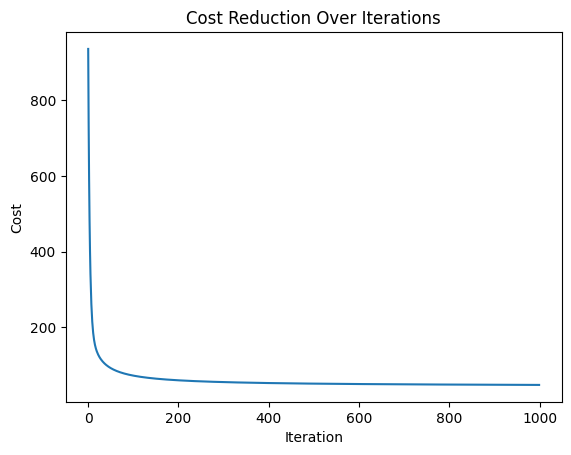

In [ ]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

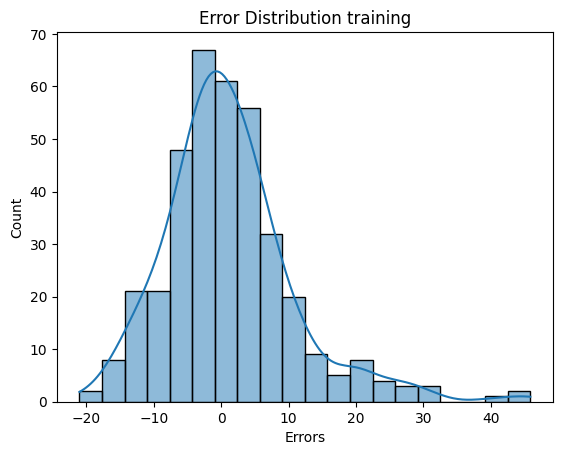

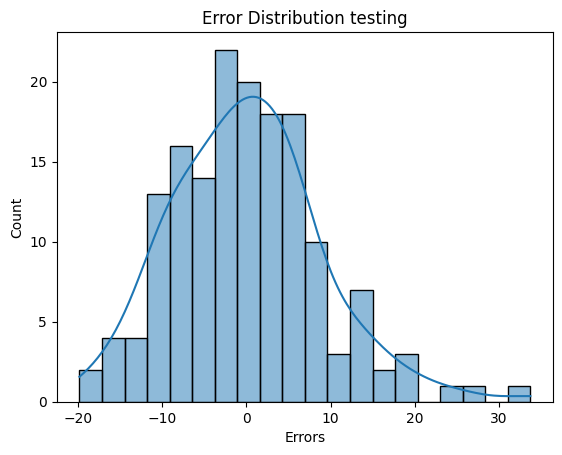

In [ ]:
y_pred = np.dot(X_train_selected_poly, w_final_poly_selected) + b_final_poly_selected
sns.histplot((y_train - y_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
y_pred = np.dot(X_test_selected_poly, w_final_poly_selected) + b_final_poly_selected
sns.histplot((y_test - y_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_train_pred_poly = np.dot(X_train_selected_poly, w_final_poly_selected) + b_final_poly_selected
r2_training_selected_poly = r2_score(y_train, y_train_pred_poly)
y_test_pred_poly = np.dot(X_test_selected_poly, w_final_poly_selected) + b_final_poly_selected
mse_selected_poly = mean_squared_error(y_test, y_test_pred_poly)
print("Mean Squared Error:", mse_selected_poly)
nrmse_selected_poly = np.sqrt(mse_selected_poly) / (np.max(y_test) - np.min(y_test))
print(f"NRMSE: {nrmse_selected_poly}")
mae_selected_poly = mean_absolute_error(y_test, y_test_pred_poly)
print("Mean Absolute Error:", mae_selected_poly)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_selected_poly = (mae_selected_poly / range_of_y)
print(f"Average Error: {avg_error_selected_poly*100:0.2f}%")
r2_testing_selected_poly = r2_score(y_test, y_test_pred_poly)
print("R2 score on training data: ", r2_training_selected_poly)
print("R2 score on testing data: ", r2_testing_selected_poly)

Mean Squared Error: 78.70067928799729
NRMSE: 0.12069850791976865
Mean Absolute Error: 6.881647439487025
Range of y: 73.5
Average Error: 9.36%
R2 score on training data:  0.6506826854077536
R2 score on testing data:  0.642451833070938


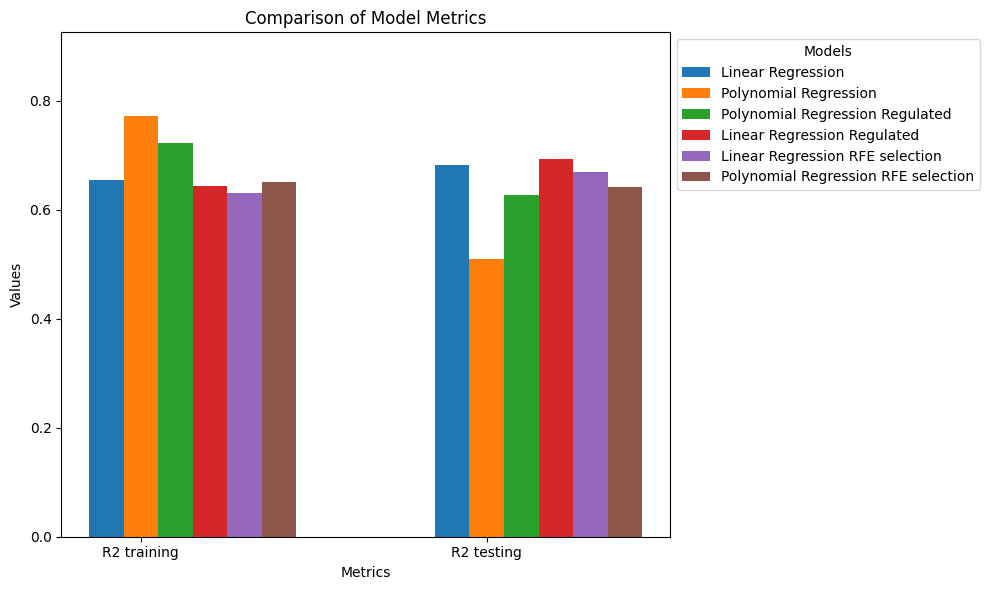

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated','Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
    'Linear Regression Regulated': [r2_training_normal_reg,r2_testing_normal_reg],
    'Linear Regression RFE selection': [r2_training_selected, r2_testing_selected],
    'Polynomial Regression RFE selection': [r2_training_selected_poly, r2_testing_selected_poly]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


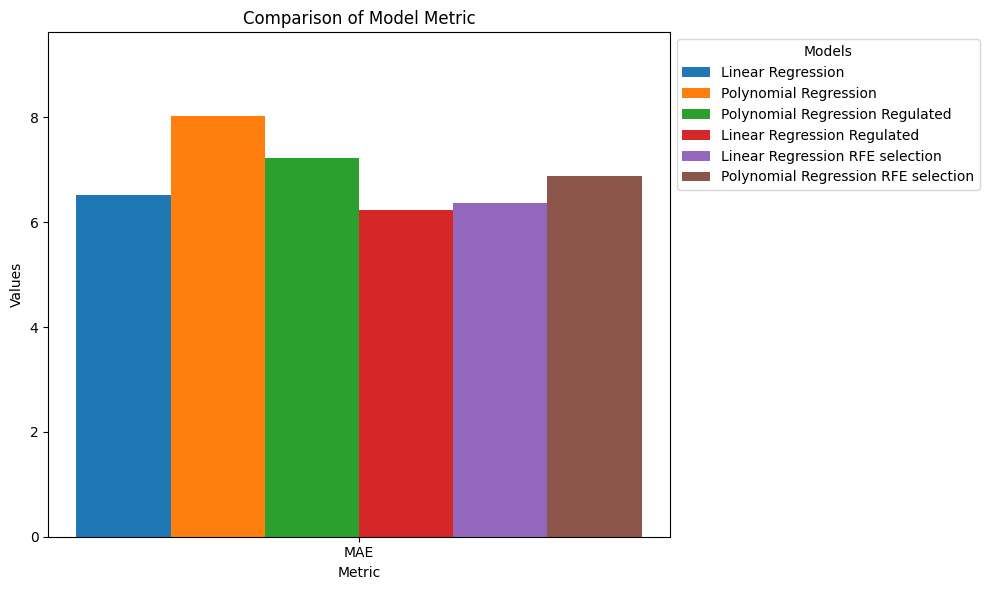

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly_reg],
    'Linear Regression Regulated': [mae_normal_reg],
    'Linear Regression RFE selection': [mae_selected],
    'Polynomial Regression RFE selection': [mae_selected_poly]
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


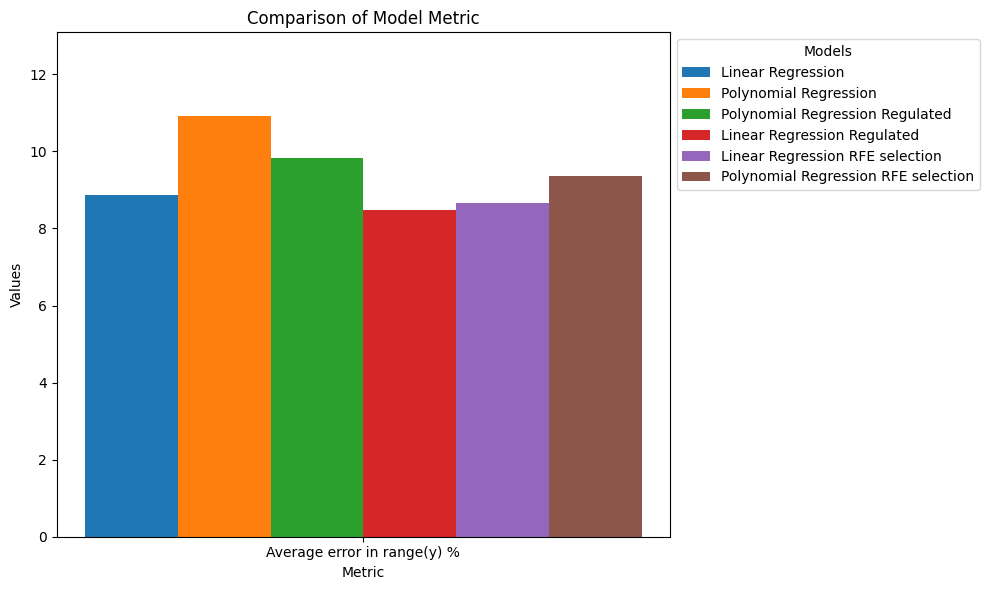

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
    'Linear Regression Regulated': [avg_error_normal_reg*100],
    'Linear Regression RFE selection': [avg_error_selected*100],
    'Polynomial Regression RFE selection': [avg_error_selected_poly*100]
}


x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


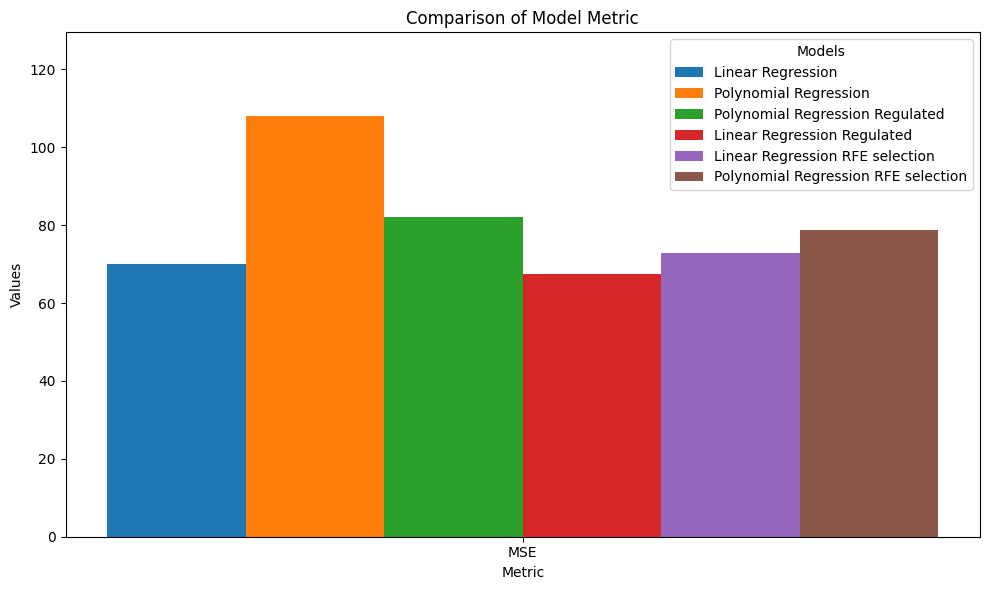

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
    'Linear Regression Regulated': [mse_normal_reg],
    'Linear Regression RFE selection': [mse_selected],
    'Polynomial Regression RFE selection': [mse_selected_poly]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


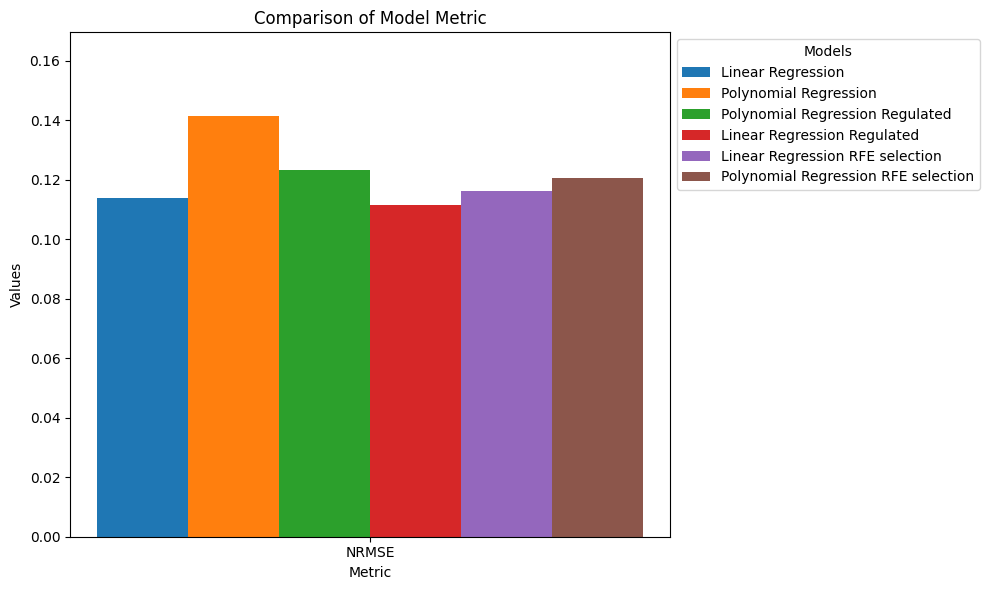

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
    'Linear Regression Regulated': [nrmse_normal_reg],
    'Linear Regression RFE selection': [nrmse_selected],
    'Polynomial Regression RFE selection': [nrmse_selected_poly]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Comparing my model with k-nearest neighbors

In [ ]:
r2_training =[]
r2_testing = []
k = []
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for i in range(1,100):
  model = KNeighborsRegressor(n_neighbors=i)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_train_scaled)
  r2 = r2_score(y_train, y_pred)
  r2_training.append(r2)
  y_pred = model.predict(X_test_scaled)
  r2 = r2_score(y_test, y_pred)
  r2_testing.append(r2)
  k.append(i)

In [ ]:
max_r2_test = max(r2_testing)
best_k = k[r2_testing.index(max_r2_test)]
print(f"Highest R2 score on the test set: {max_r2_test:.4f} at k = {best_k}")
max_r2_train = r2_training[r2_testing.index(max_r2_test)]
print(f"R2 score on train set: {max_r2_train:.4}")

Highest R2 score on the test set: 0.6459 at k = 13
R2 score on train set: 0.6532


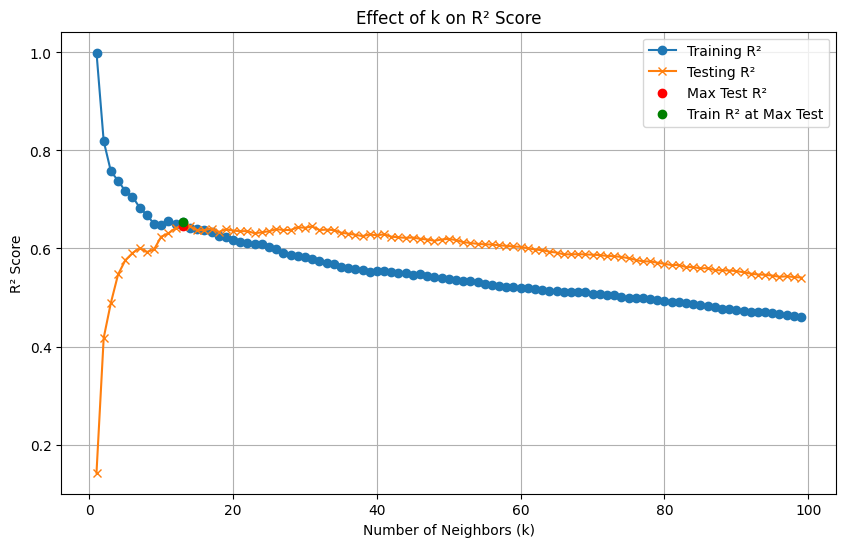

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k, r2_training, label='Training R²', marker='o', linestyle='-')
plt.plot(k, r2_testing, label='Testing R²', marker='x', linestyle='-')
plt.scatter(best_k, max_r2_test, color='red', label='Max Test R²', zorder=5)
plt.scatter(best_k, max_r2_train, color='green', label='Train R² at Max Test', zorder=5)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.title('Effect of k on R² Score')
plt.legend()
plt.grid()
plt.show()


In [ ]:
model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse_knn)
nrmse_knn = np.sqrt(mse_knn) / (np.max(y_test) - np.min(y_test))
print(f"NRMSE: {nrmse_knn}")
mae_knn = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error:", mae_knn)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_knn = (mae_knn / range_of_y)
print(f"Average Error: {avg_error_knn*100:0.2f}%")
r2_training_knn = r2_score(y_train, y_pred_train)
print("R2 score on training data: ", r2_training_knn)
r2_testing_knn = r2_score(y_test, y_pred_test)
print("R2 score on testing data: ", r2_testing_knn)

Mean Squared Error: 77.93672018533178
NRMSE: 0.12011126020930697
Mean Absolute Error: 6.917040686985969
Range of y: 73.5
Average Error: 9.41%
R2 score on training data:  0.6532092308264599
R2 score on testing data:  0.6459226058677934


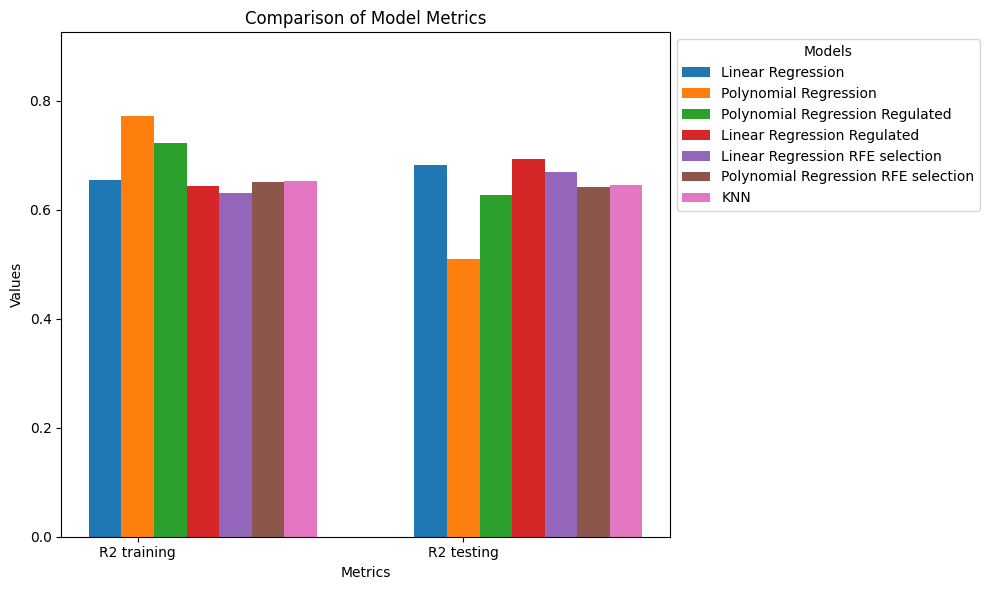

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
    'Linear Regression Regulated': [r2_training_normal_reg,r2_testing_normal_reg],
    'Linear Regression RFE selection': [r2_training_selected, r2_testing_selected],
    'Polynomial Regression RFE selection': [r2_training_selected_poly, r2_testing_selected_poly],
    'KNN': [r2_training_knn, r2_testing_knn]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


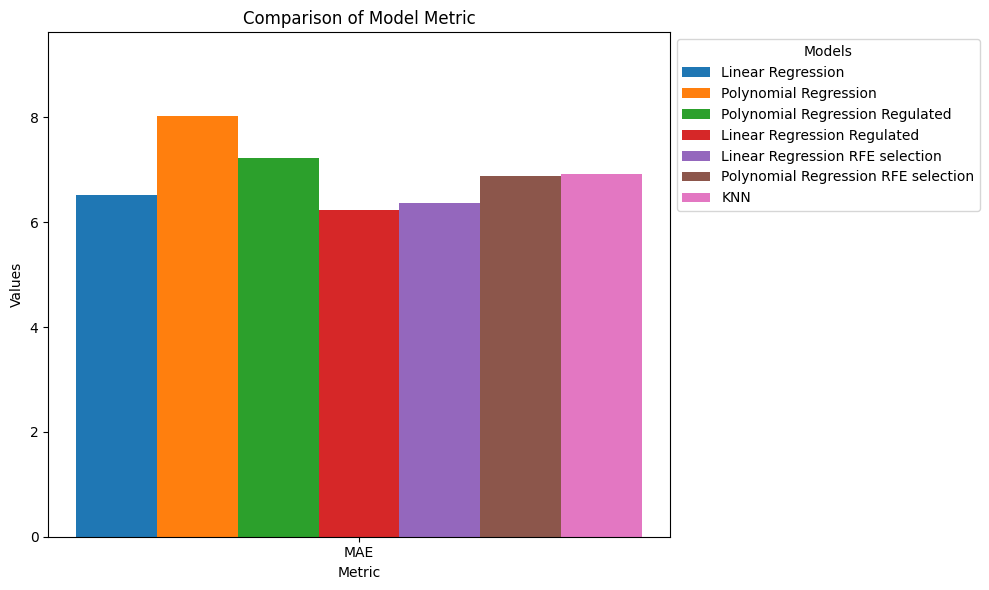

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly_reg],
    'Linear Regression Regulated': [mae_normal_reg],
    'Linear Regression RFE selection': [mae_selected],
    'Polynomial Regression RFE selection': [mae_selected_poly],
    'KNN': [mae_knn]
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


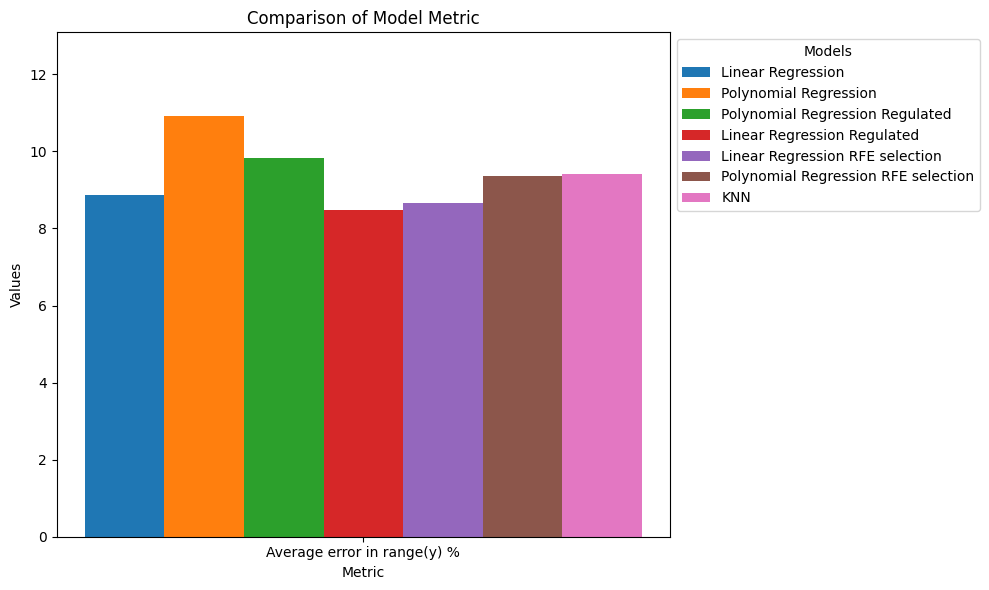

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
    'Linear Regression Regulated': [avg_error_normal_reg*100],
    'Linear Regression RFE selection': [avg_error_selected*100],
    'Polynomial Regression RFE selection': [avg_error_selected_poly*100],
    'KNN': [avg_error_knn*100]
}


x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


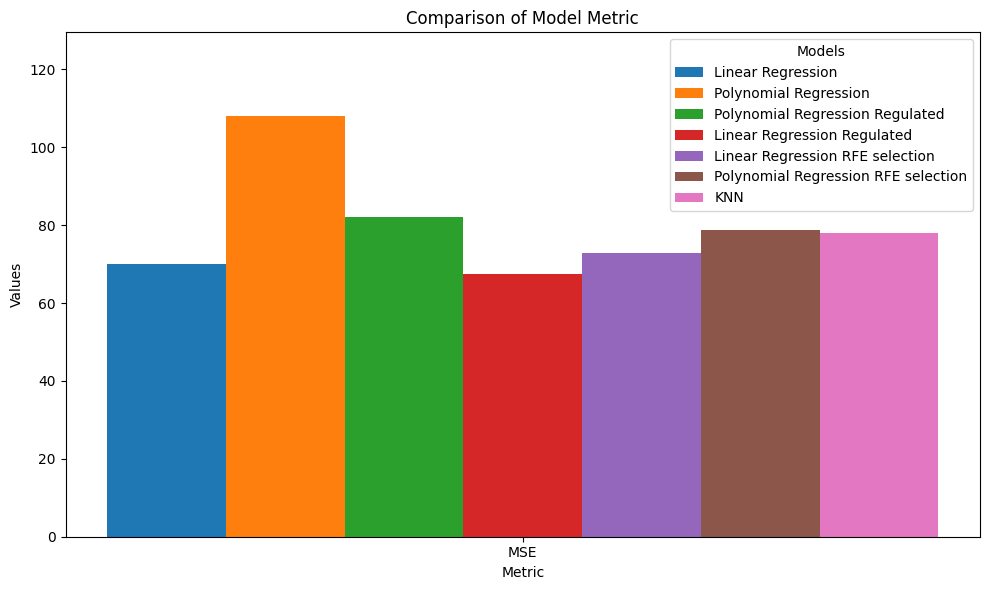

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
    'Linear Regression Regulated': [mse_normal_reg],
    'Linear Regression RFE selection': [mse_selected],
    'Polynomial Regression RFE selection': [mse_selected_poly],
    'KNN': [mse_knn]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models')
plt.tight_layout()
plt.show()


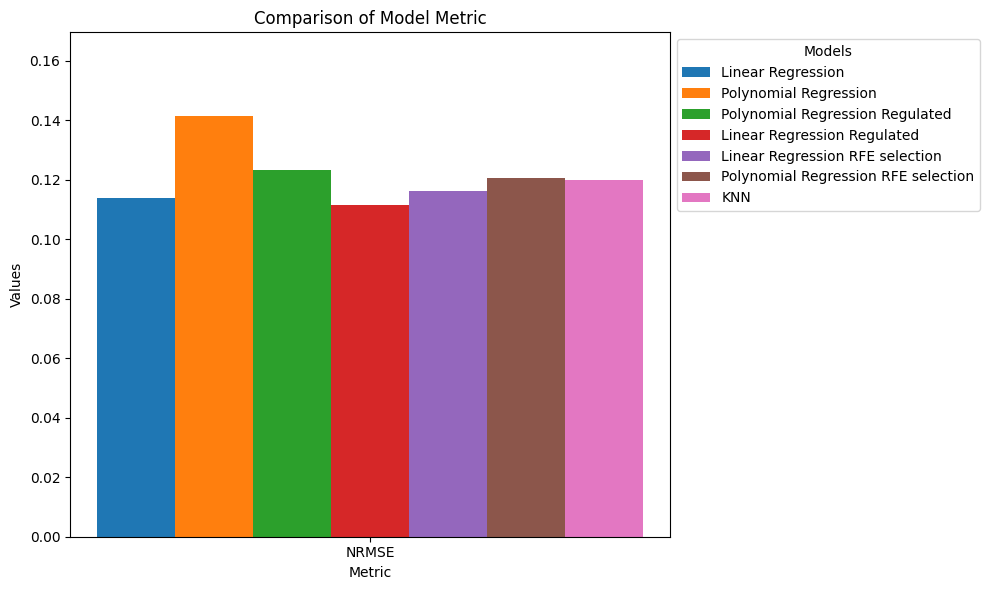

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
    'Linear Regression Regulated': [nrmse_normal_reg],
    'Linear Regression RFE selection': [nrmse_selected],
    'Polynomial Regression RFE selection': [nrmse_selected_poly],
    'KNN': [nrmse_knn]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Comparing with model trained with Gradient boosting

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

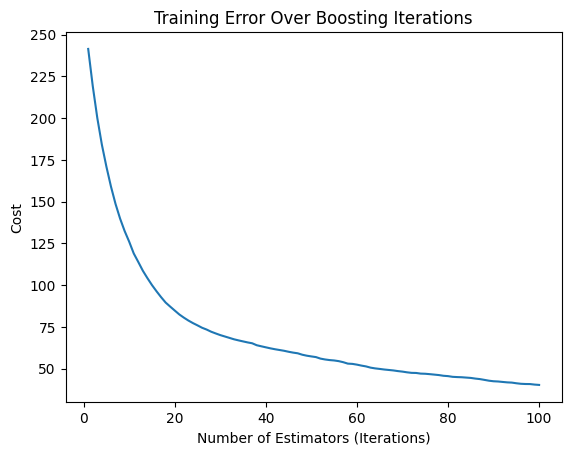

In [ ]:
j_hist = []
for y_pred in gbr.staged_predict(X_train):
    j_hist.append(mean_squared_error(y_train, y_pred))
plt.plot(range(1, len(j_hist) + 1), j_hist)
plt.xlabel('Number of Estimators (Iterations)')
plt.ylabel('Cost')
plt.title('Training Error Over Boosting Iterations')
plt.show()

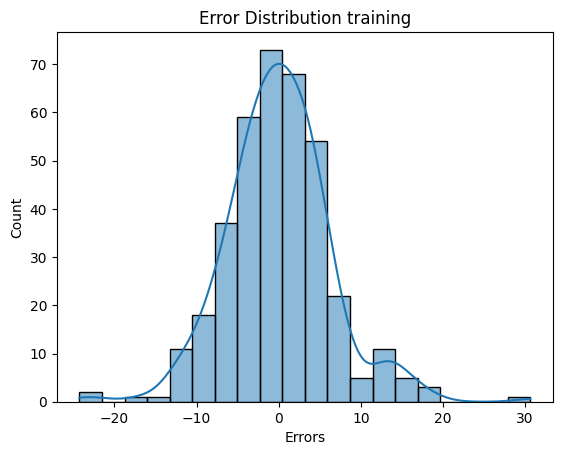

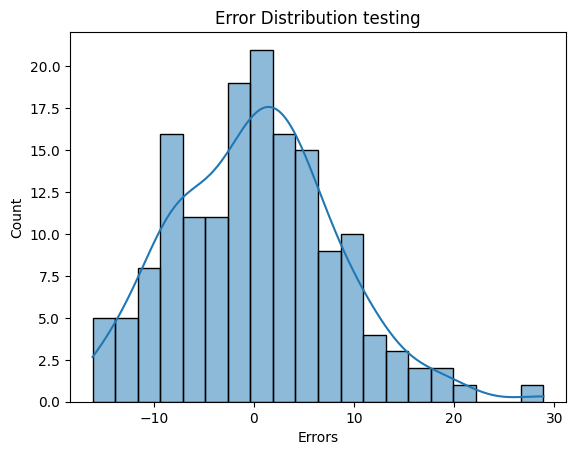

In [ ]:
y_train_pred = gbr.predict(X_train)
y_testing_pred = gbr.predict(X_test)
sns.histplot((y_train - y_train_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
sns.histplot((y_test - y_testing_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_train_pred = gbr.predict(X_train)
r2_training_gbr_def = r2_score(y_train, y_train_pred)
print("R2 score on training data: ", r2_training_gbr_def)
y_testing_pred = gbr.predict(X_test)
r2_testing_gbr_def = r2_score(y_test, y_testing_pred)
print("R2 score on testing data: ", r2_testing_gbr_def)
mae_gbr_def = mean_absolute_error(y_test, y_testing_pred)
print("Mean Absolute Error:", mae_gbr_def)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
avg_error_gbr_def = (mae_gbr_def / range_of_y)
print(f"Average Error: {avg_error_gbr_def * 100:.2f}%")
mse_gbr_def = mean_squared_error(y_test, y_testing_pred)
print("Mean Squared Error:", mse_gbr_def)
nrmse_gbr_def = np.sqrt(mse_gbr_def) / range_of_y
print(f"NRMSE: {nrmse_gbr_def}")


R2 score on training data:  0.8503494245375613
R2 score on testing data:  0.7107044664133622
Mean Absolute Error: 6.31277952687419
Range of y: 73.5
Average Error: 8.59%
Mean Squared Error: 63.67744856252944
NRMSE: 0.10856891252649531


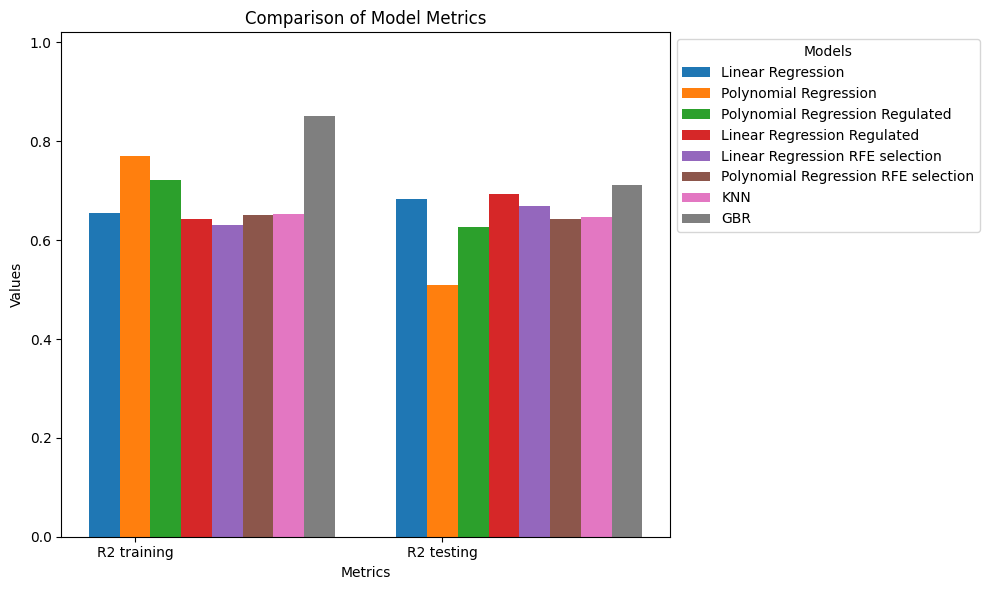

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN','GBR']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
    'Linear Regression Regulated': [r2_training_normal_reg,r2_testing_normal_reg],
    'Linear Regression RFE selection': [r2_training_selected, r2_testing_selected],
    'Polynomial Regression RFE selection': [r2_training_selected_poly, r2_testing_selected_poly],
    'KNN': [r2_training_knn, r2_testing_knn],
    'GBR': [r2_training_gbr_def, r2_testing_gbr_def]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


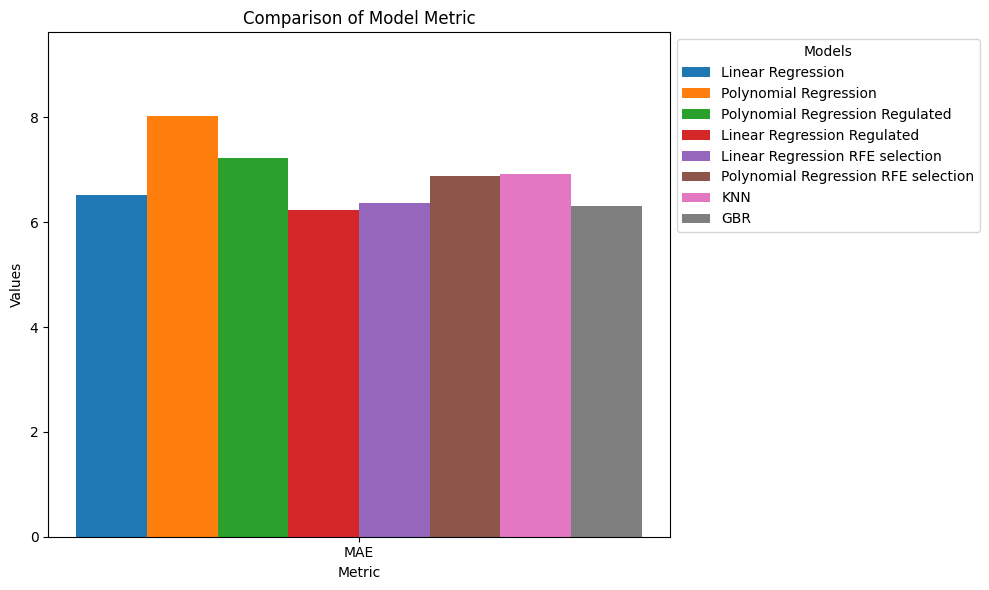

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly_reg],
    'Linear Regression Regulated': [mae_normal_reg],
    'Linear Regression RFE selection': [mae_selected],
    'Polynomial Regression RFE selection': [mae_selected_poly],
    'KNN': [mae_knn],
    'GBR': [mae_gbr_def]
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


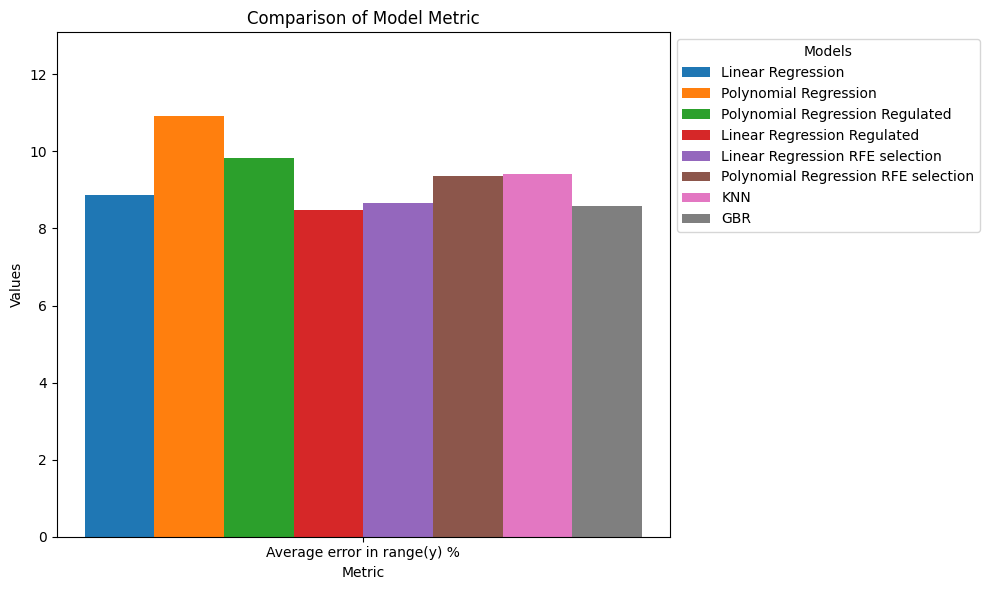

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
    'Linear Regression Regulated': [avg_error_normal_reg*100],
    'Linear Regression RFE selection': [avg_error_selected*100],
    'Polynomial Regression RFE selection': [avg_error_selected_poly*100],
    'KNN': [avg_error_knn*100],
    'GBR': [avg_error_gbr_def*100]
}


x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

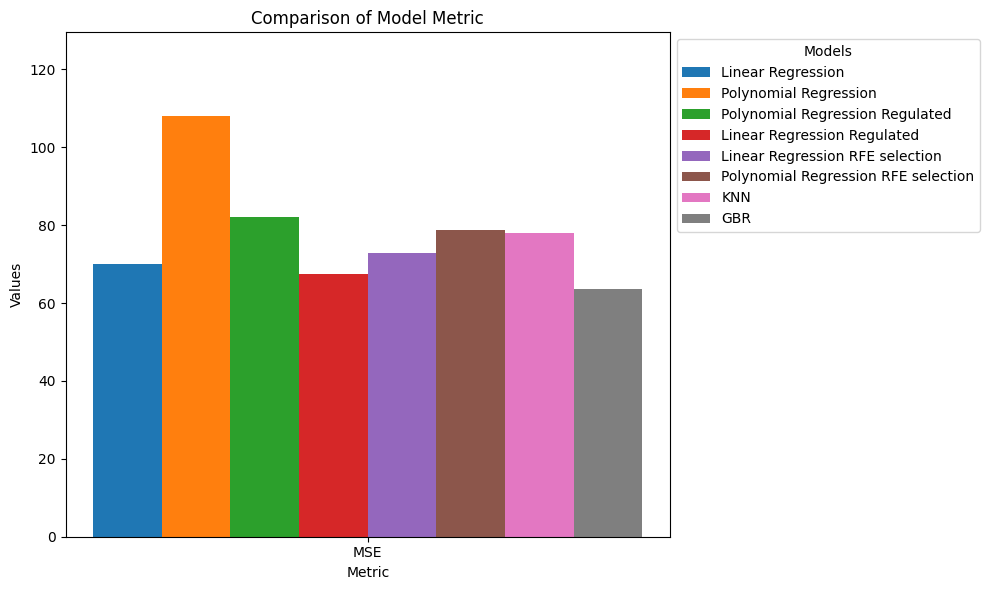

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
    'Linear Regression Regulated': [mse_normal_reg],
    'Linear Regression RFE selection': [mse_selected],
    'Polynomial Regression RFE selection': [mse_selected_poly],
    'KNN': [mse_knn],
    'GBR': [mse_gbr_def]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


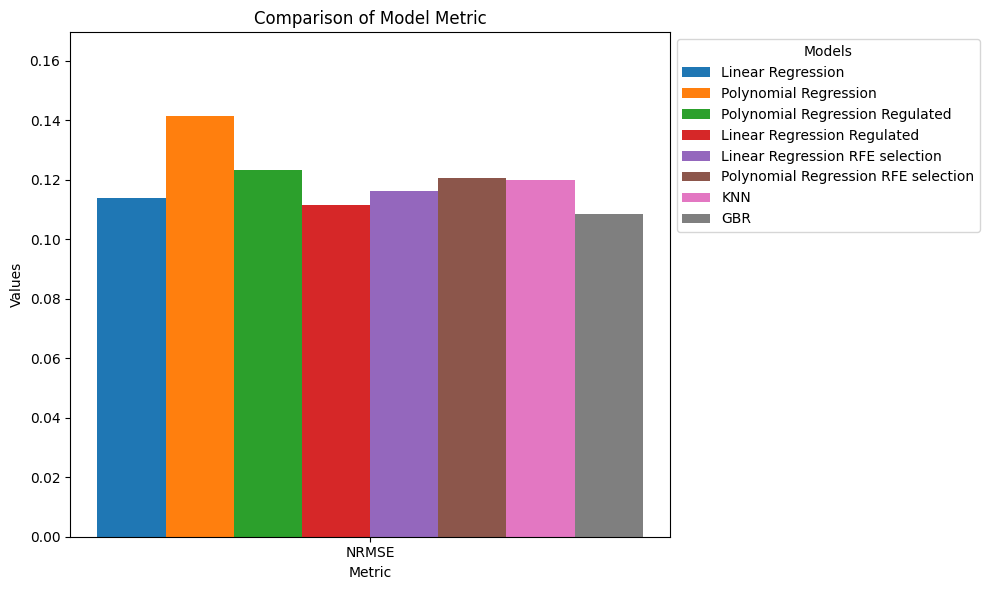

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
    'Linear Regression Regulated': [nrmse_normal_reg],
    'Linear Regression RFE selection': [nrmse_selected],
    'Polynomial Regression RFE selection': [nrmse_selected_poly],
    'KNN': [nrmse_knn],
    'GBR': [nrmse_gbr_def]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100, 150,200,300],
    'learning_rate': [0.00001,0.0001,0.001,0.01, 0.05, 0.1],
    'max_depth': [2,3,4,5],
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
best_gbr = grid_search.best_estimator_

Fitting 5 folds for each of 312 candidates, totalling 1560 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}
Best cross-validation score: 0.6185460330268293


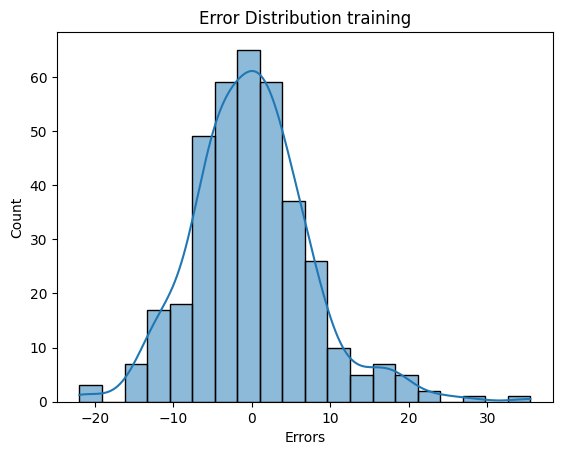

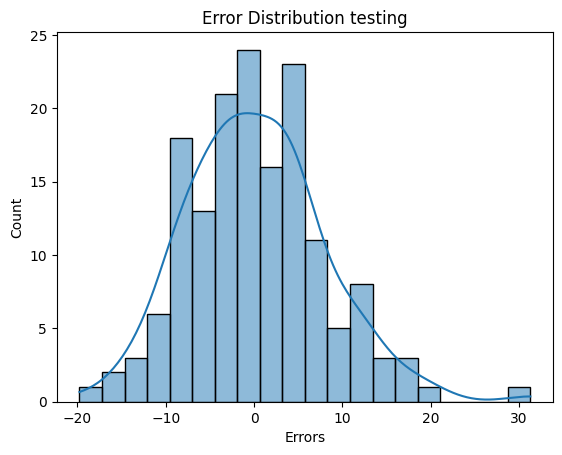

In [ ]:
y_train_pred = grid_search.predict(X_train)
y_testing_pred = grid_search.predict(X_test)
sns.histplot((y_train - y_train_pred), bins=20, kde=True)
plt.title("Error Distribution training")
plt.xlabel("Errors")
plt.show()
sns.histplot((y_test - y_testing_pred), bins=20, kde=True)
plt.title("Error Distribution testing")
plt.xlabel("Errors")
plt.show()

In [ ]:
y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)
r2_training_gbr_adj = r2_score(y_train, y_train_pred)
r2_testing_gbr_adj = r2_score(y_test, y_test_pred)
print("Final R2 scores with tuned model:")
print(f"Training R2: {r2_training_gbr_adj:.4f}")
print(f"Testing R2: {r2_testing_gbr_adj:.4f}")
mse_gbr_adj = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse_gbr_adj)
nrmse_gbr_adj = np.sqrt(mse_gbr_adj) / (np.max(y_test) - np.min(y_test))
print(f"NRMSE: {nrmse_gbr_adj}")
mae_gbr_adj = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae_gbr_adj)
range_of_y = np.max(y_test) - np.min(y_test)
print(f"Range of y: {range_of_y}")
error_gbr_adj = (mae_gbr_adj / range_of_y)
print(f"Average Error: {error_gbr_adj*100:0.2f}%")

Final R2 scores with tuned model:
Training R2: 0.7878
Testing R2: 0.7223
Mean Squared Error: 61.12117835588773
NRMSE: 0.1063673942357647
Mean Absolute Error: 6.133971956013352
Range of y: 73.5
Average Error: 8.35%


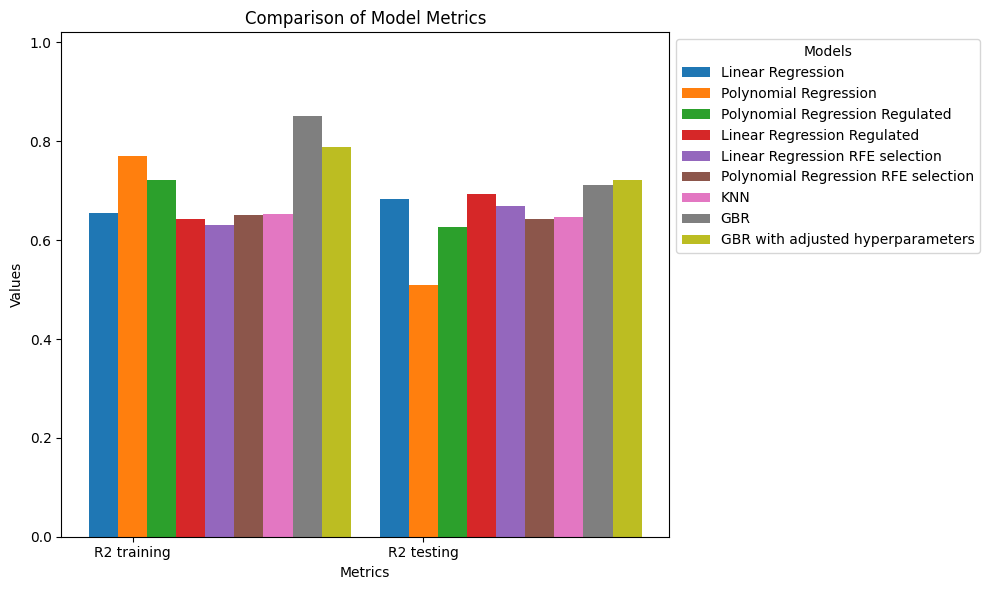

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR', 'GBR with adjusted hyperparameters']
metrics = ['R2 training', 'R2 testing']
values = {
    'Linear Regression': [r2_training_normal,r2_testing_normal],
    'Polynomial Regression': [r2_training_poly, r2_testing_poly],
    'Polynomial Regression Regulated': [r2_training_poly_reg, r2_test_poly_reg],
    'Linear Regression Regulated': [r2_training_normal_reg,r2_testing_normal_reg],
    'Linear Regression RFE selection': [r2_training_selected, r2_testing_selected],
    'Polynomial Regression RFE selection': [r2_training_selected_poly, r2_testing_selected_poly],
    'KNN': [r2_training_knn, r2_testing_knn],
    'GBR': [r2_training_gbr_def, r2_testing_gbr_def],
    'GBR with adjusted hyperparameters': [r2_training_gbr_adj, r2_testing_gbr_adj]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


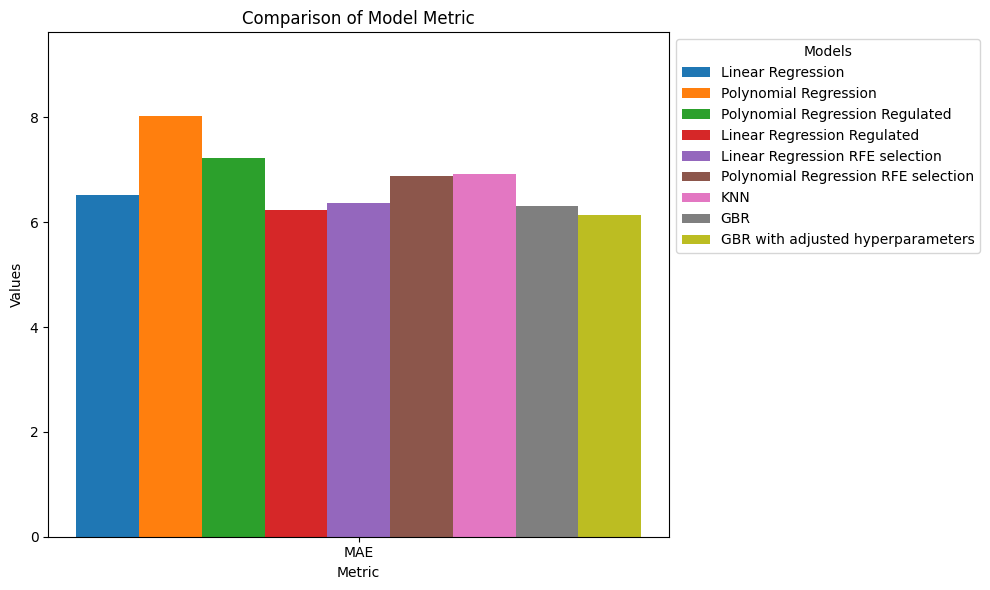

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR', 'GBR with adjusted hyperparameters']
metrics = ['MAE']
values = {
    'Linear Regression': [mae_normal],
    'Polynomial Regression': [mae_poly],
    'Polynomial Regression Regulated': [mae_poly_reg],
    'Linear Regression Regulated': [mae_normal_reg],
    'Linear Regression RFE selection': [mae_selected],
    'Polynomial Regression RFE selection': [mae_selected_poly],
    'KNN': [mae_knn],
    'GBR': [mae_gbr_def],
    'GBR with adjusted hyperparameters': [mae_gbr_adj]
}
x = np.arange(len(metrics))

x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


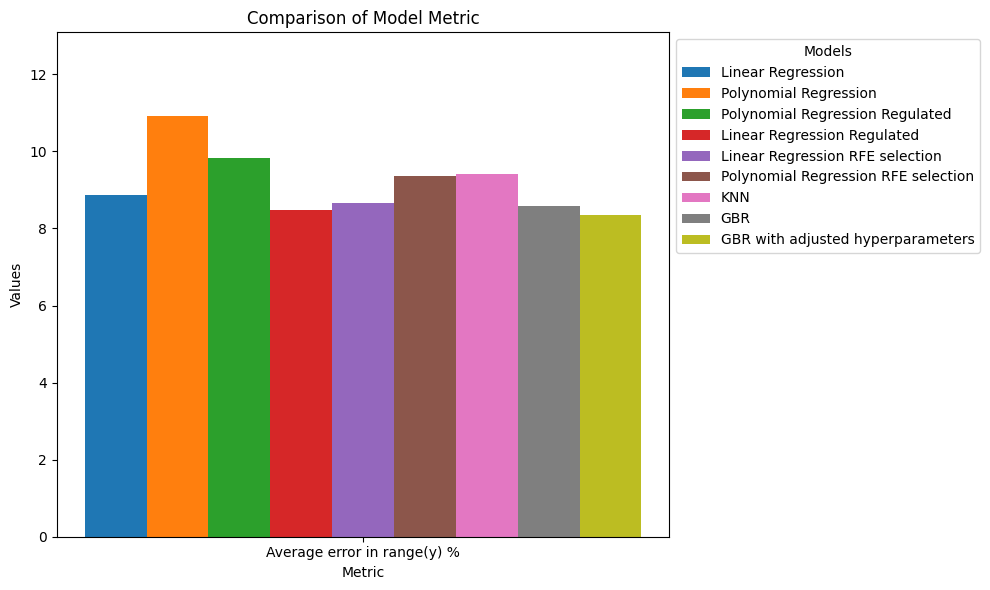

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR', 'GBR with adjusted hyperparameters']
metrics = ['Average error in range(y) %']
values = {
    'Linear Regression': [avg_error_normal*100],
    'Polynomial Regression': [avg_error_poly*100],
    'Polynomial Regression Regulated': [avg_error_poly_reg*100],
    'Linear Regression Regulated': [avg_error_normal_reg*100],
    'Linear Regression RFE selection': [avg_error_selected*100],
    'Polynomial Regression RFE selection': [avg_error_selected_poly*100],
    'KNN': [avg_error_knn*100],
    'GBR': [avg_error_gbr_def*100],
    'GBR with adjusted hyperparameters': [error_gbr_adj*100]
}


x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

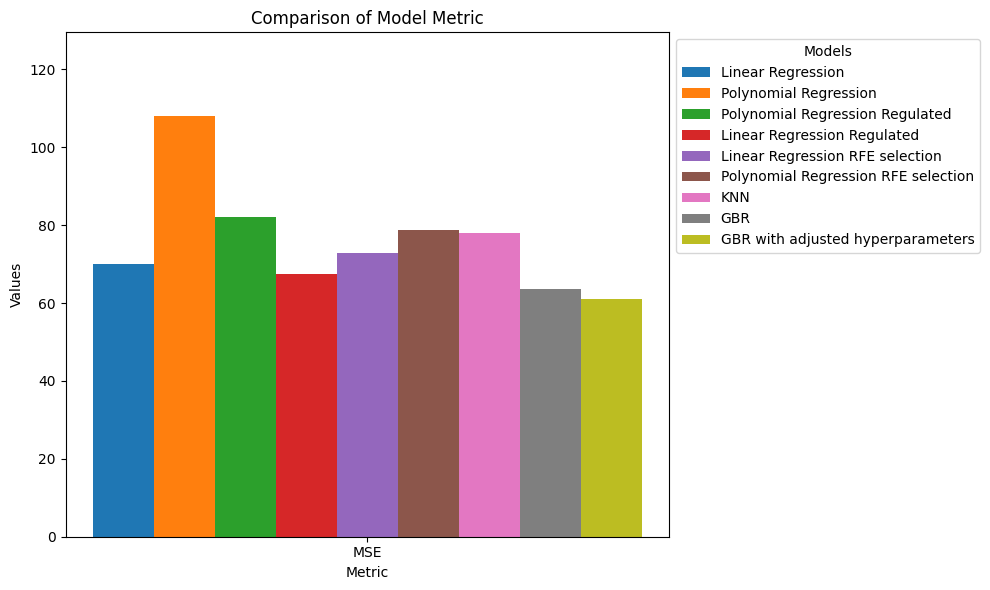

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR', 'GBR with adjusted hyperparameters']
metrics = ['MSE']
values = {
    'Linear Regression': [mse_normal],
    'Polynomial Regression': [mse_poly],
    'Polynomial Regression Regulated':[mse_poly_reg],
    'Linear Regression Regulated': [mse_normal_reg],
    'Linear Regression RFE selection': [mse_selected],
    'Polynomial Regression RFE selection': [mse_selected_poly],
    'KNN': [mse_knn],
    'GBR': [mse_gbr_def],
    'GBR with adjusted hyperparameters': [mse_gbr_adj]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


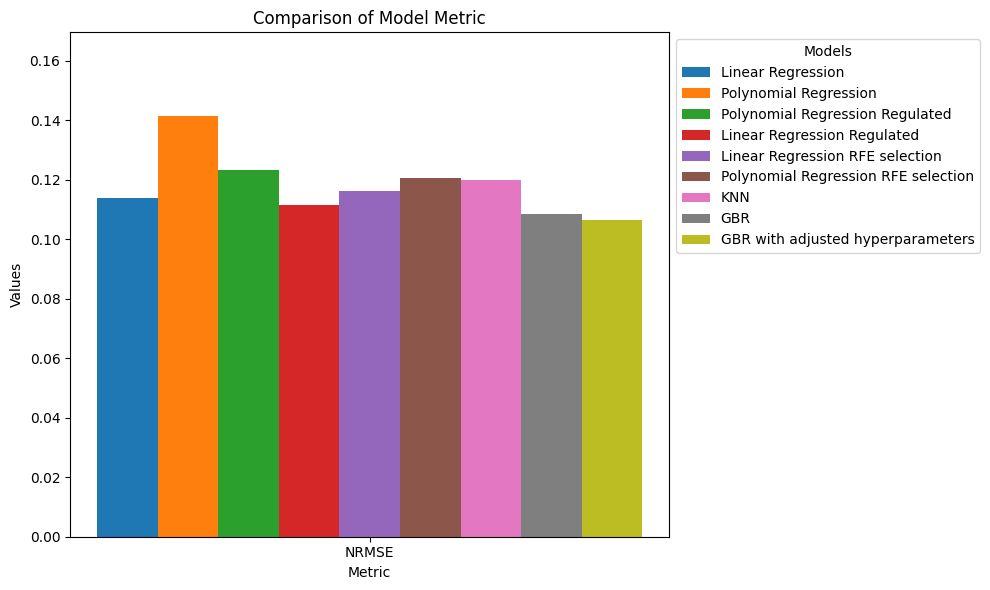

In [ ]:
models = ['Linear Regression', 'Polynomial Regression', 'Polynomial Regression Regulated', 'Linear Regression Regulated', 'Linear Regression RFE selection', 'Polynomial Regression RFE selection', 'KNN', 'GBR', 'GBR with adjusted hyperparameters']
metrics = ['NRMSE']
values = {
    'Linear Regression': [nrmse_normal],
    'Polynomial Regression': [nrmse_poly],
    'Polynomial Regression Regulated':[nrmse_poly_reg],
    'Linear Regression Regulated': [nrmse_normal_reg],
    'Linear Regression RFE selection': [nrmse_selected],
    'Polynomial Regression RFE selection': [nrmse_selected_poly],
    'KNN': [nrmse_knn],
    'GBR': [nrmse_gbr_def],
    'GBR with adjusted hyperparameters': [nrmse_gbr_adj]
}
x = np.arange(len(metrics))
width = 0.10
fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[model], width, label=model)
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Metric')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
max_value = max(max(values[model]) for model in models)
ax.set_ylim(0, max_value * 1.2)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
